In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
#reading the dataset
df=pd.read_excel("Healthcare_dataset.xlsx", sheet_name='Dataset')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [4]:
df.shape

(3424, 69)

In [7]:
# checking for duplicates
df.Ptid.unique().shape

(3424,)

In [5]:
#information on the numerical columns
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [6]:
# checking for missing variables
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [9]:
#getting variable dtypes
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

In [10]:
#List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  2


,Dexa_Freq_During_Rx,Count_Of_Risks
0,0,0
1,0,0
2,0,2
3,0,1
4,0,1


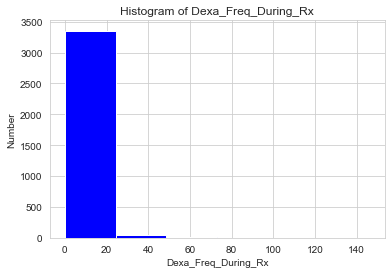

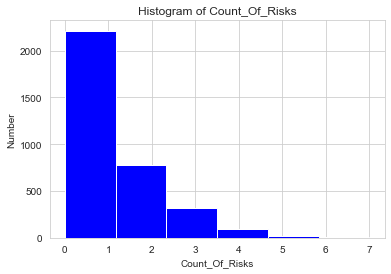

In [15]:
# ploting histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(6,4))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(df, numerical_features)

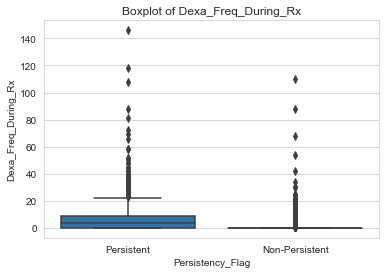

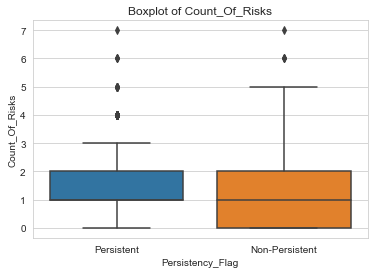

In [11]:
#plotting box plot to check for outliers
for col in numerical_features:
        sns.set_style('whitegrid')
        sns.boxplot(x='Persistency_Flag', y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) 
        plt.show()

In [18]:
# measuring skewness and kurtosis of numerical columns
def measure_skew_kurtosis(cols):
    for col in cols:
        print(col)
        result = df[[col]].agg(['skew', 'kurtosis']).transpose()
        print(result)
measure_skew_kurtosis(numerical_features)

Dexa_Freq_During_Rx
                        skew   kurtosis
Dexa_Freq_During_Rx  6.80873  74.758378
Count_Of_Risks
                    skew  kurtosis
Count_Of_Risks  0.879791  0.900486


In [12]:
#dropping the id column
df.drop(['Ptid'], axis=1, inplace=True)

In [14]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
df[categorical_features].head()

Number of categorical variables:  66


,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N


In [16]:
for col in categorical_features:
    print(df[col].value_counts())

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
Female    3230
Male       194
Name: Gender, dtype: int64
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                      

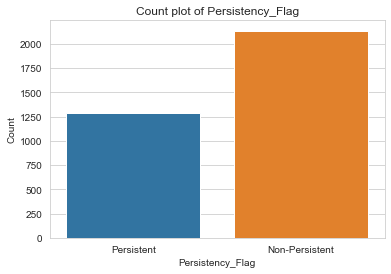

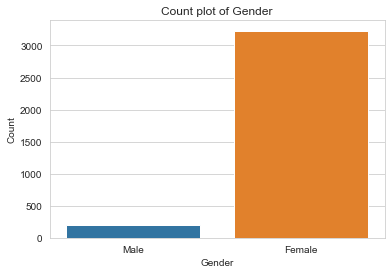

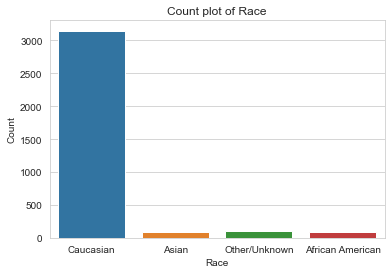

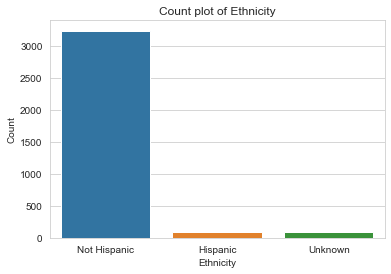

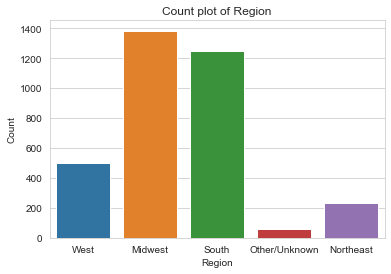

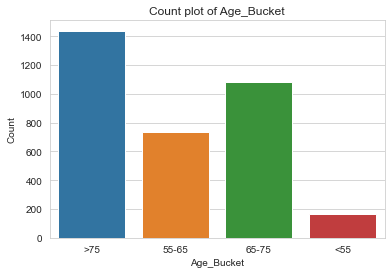

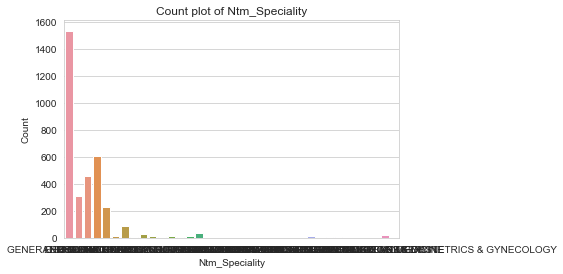

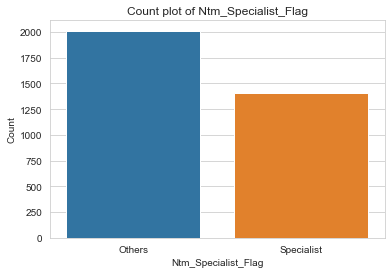

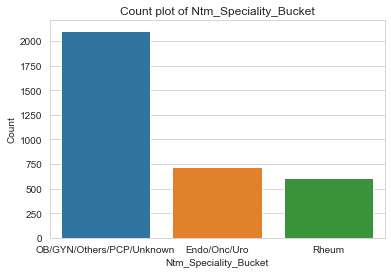

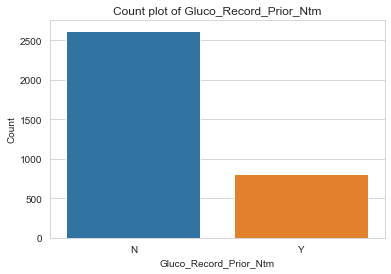

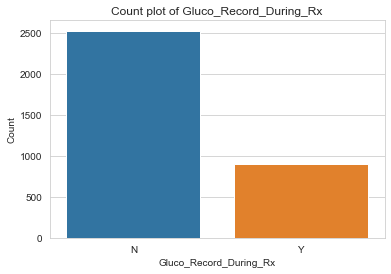

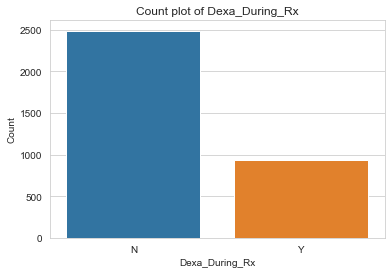

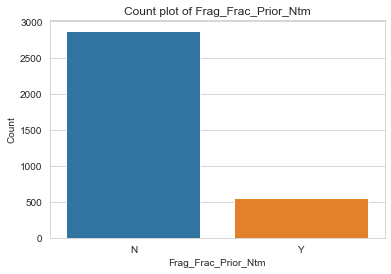

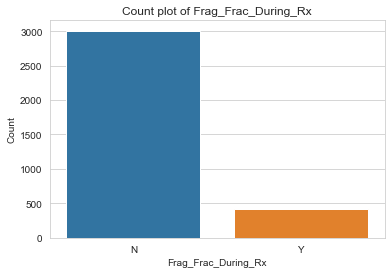

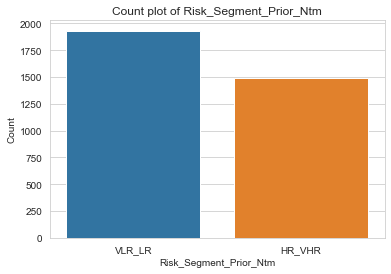

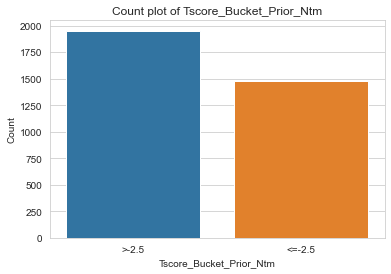

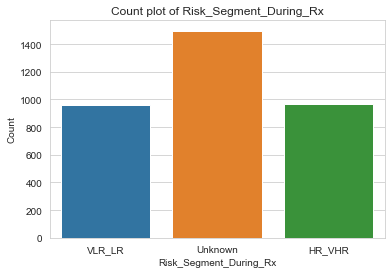

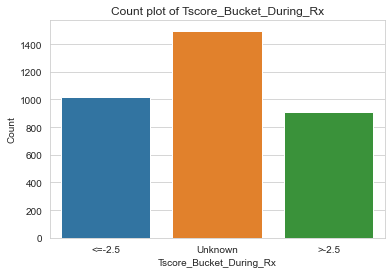

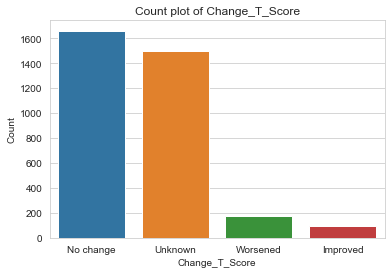

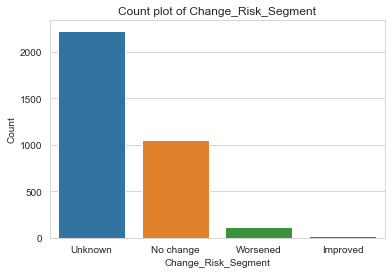

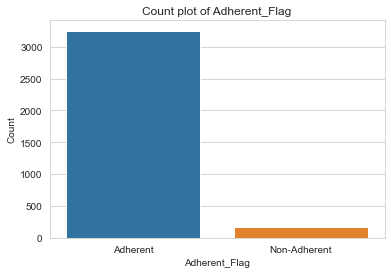

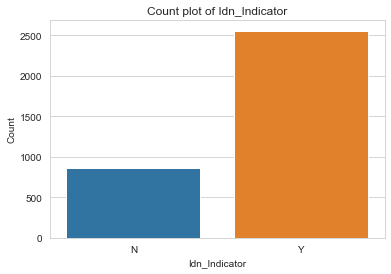

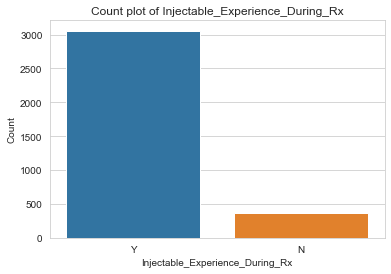

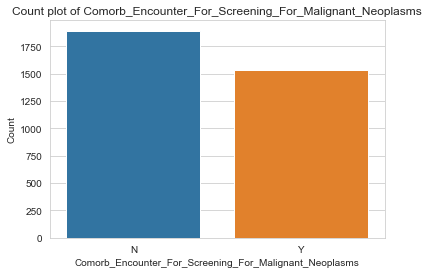

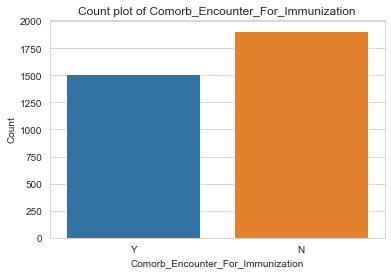

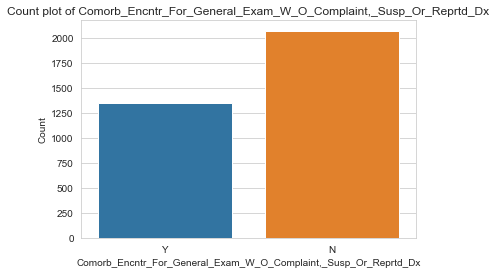

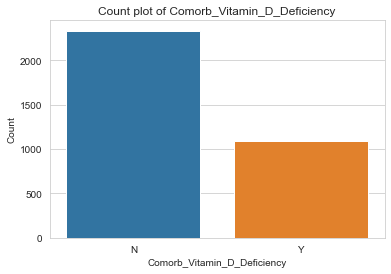

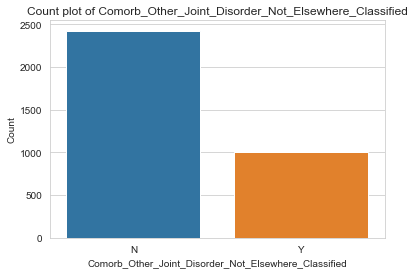

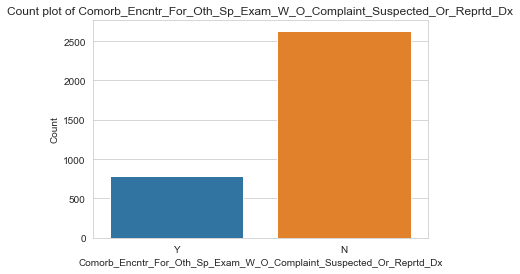

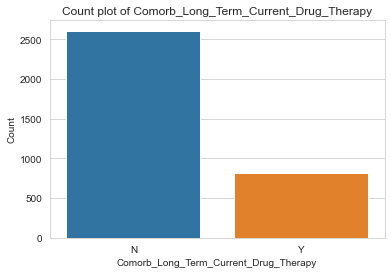

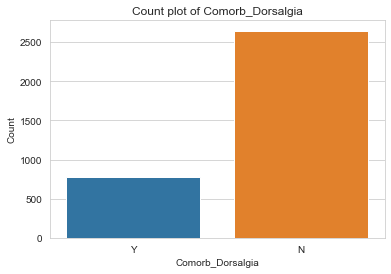

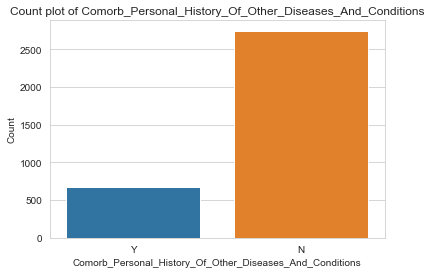

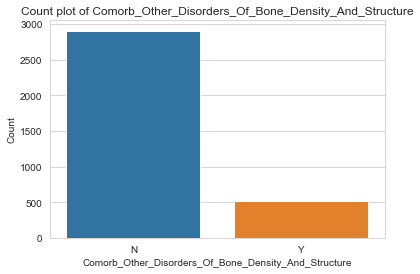

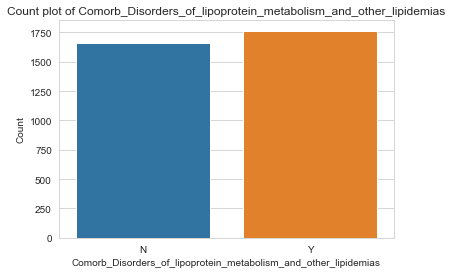

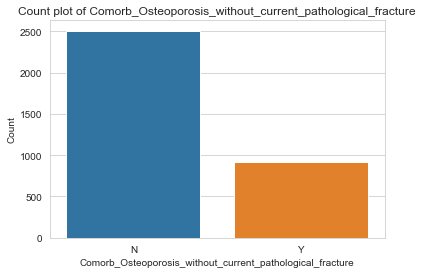

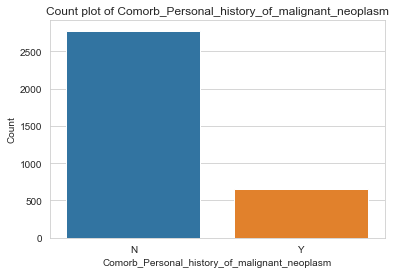

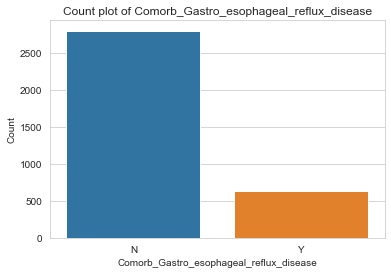

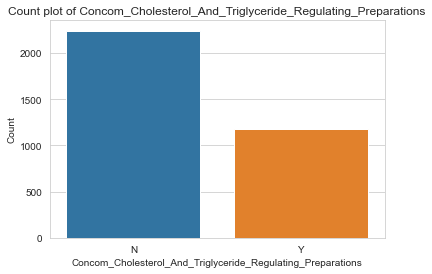

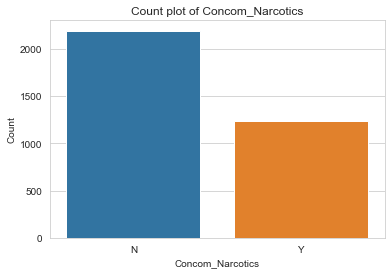

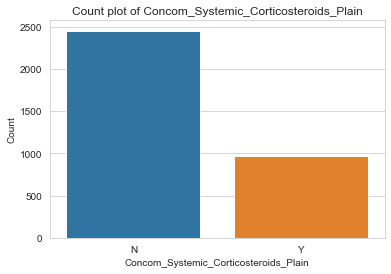

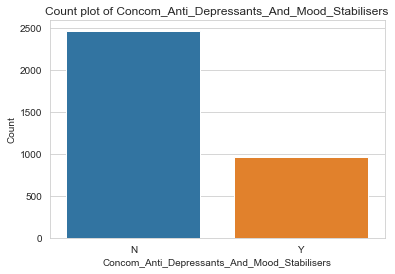

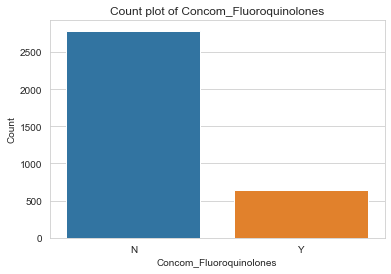

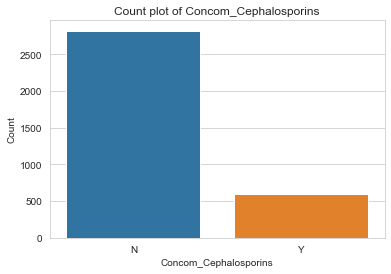

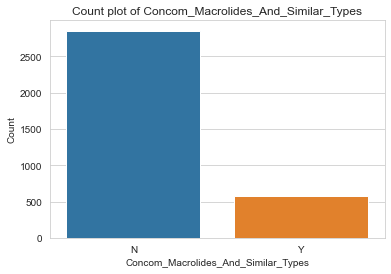

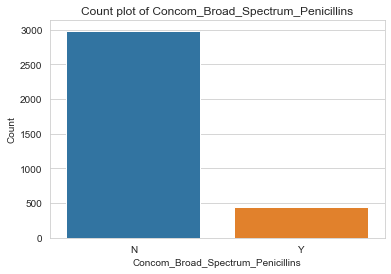

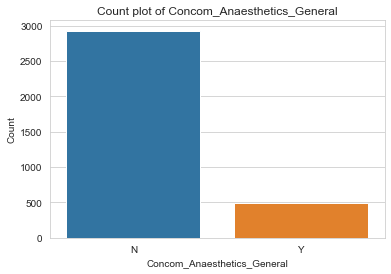

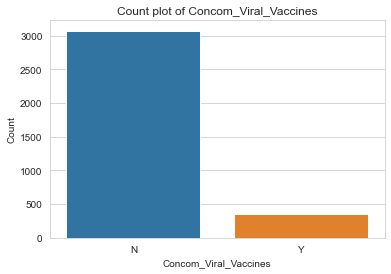

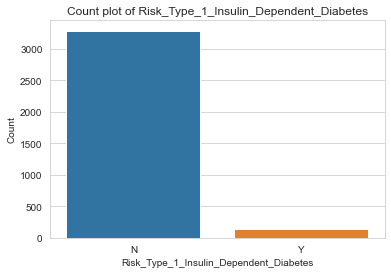

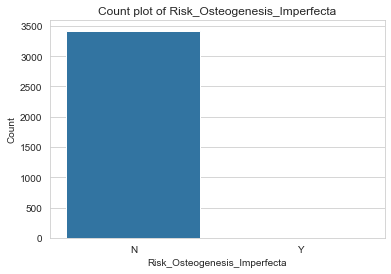

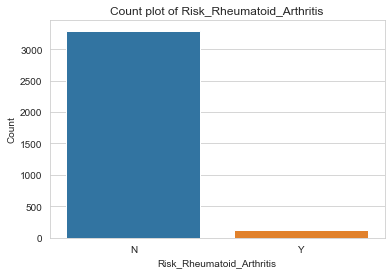

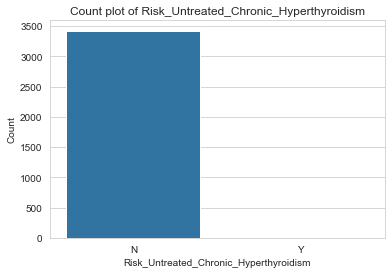

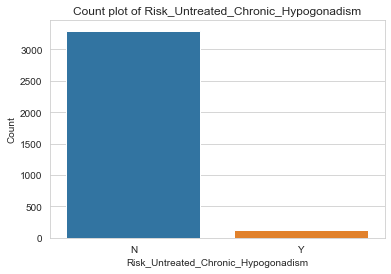

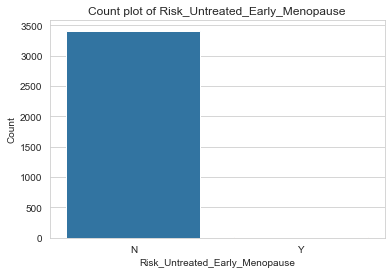

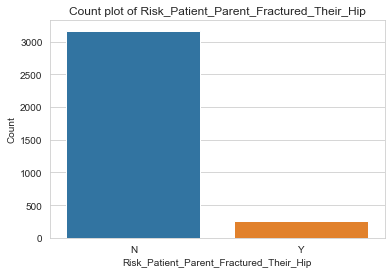

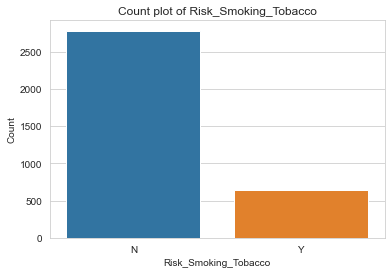

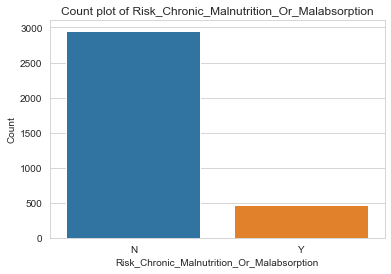

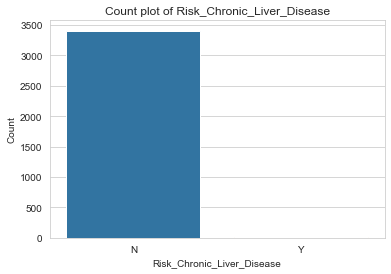

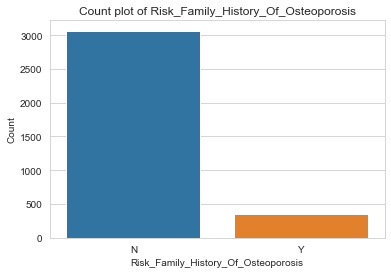

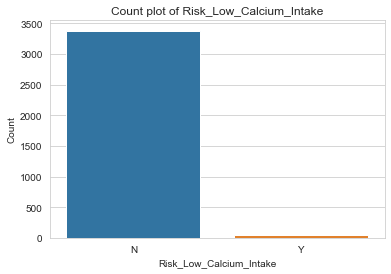

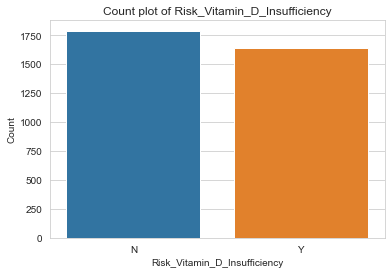

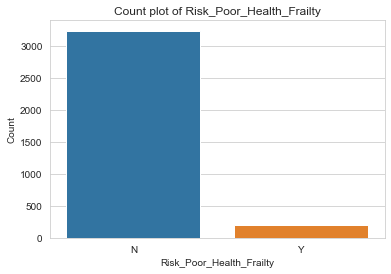

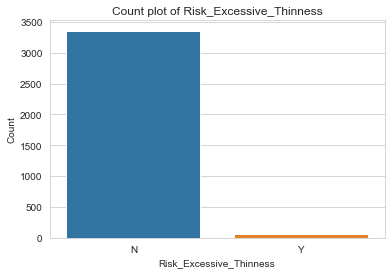

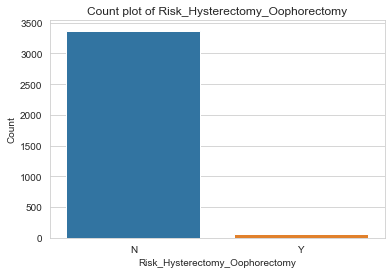

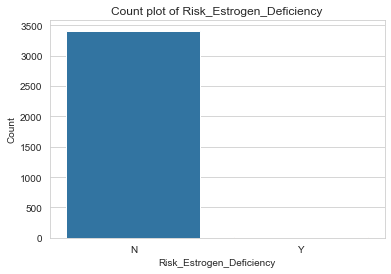

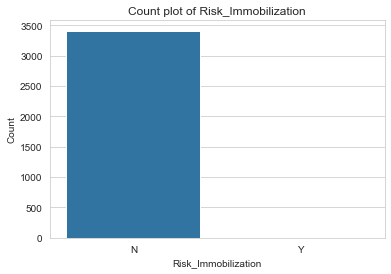

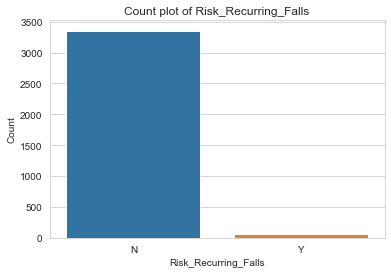

In [19]:
for col in categorical_features:
        sns.set_style('whitegrid')
        sns.countplot(x=col, data=df)
        plt.title('Count plot of ' + col)
        plt.ylabel('Count') 
        plt.show()

Persistency_Flag


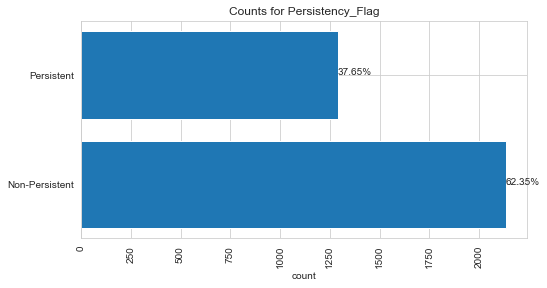

Gender


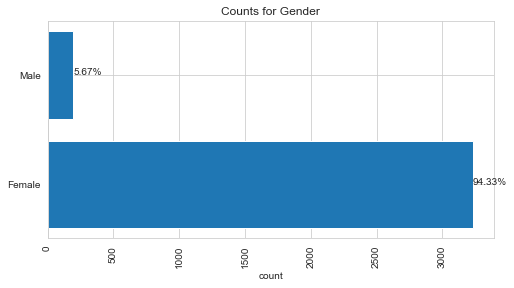

Race


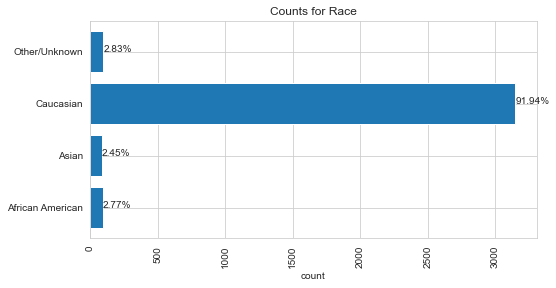

Ethnicity


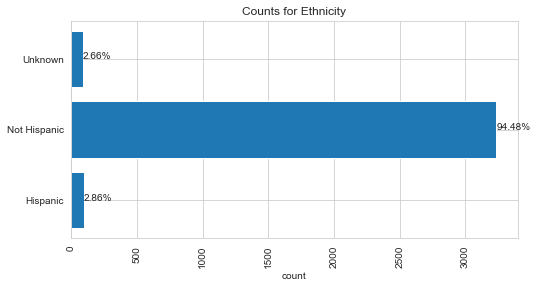

Region


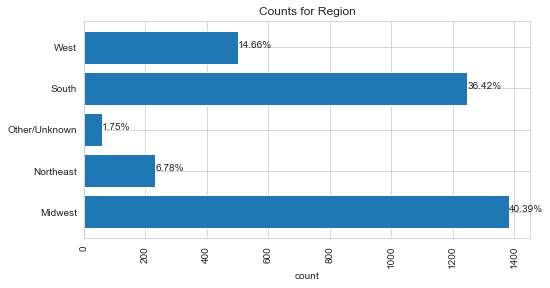

Age_Bucket


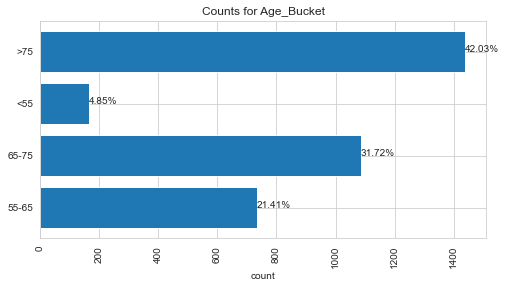

Ntm_Speciality


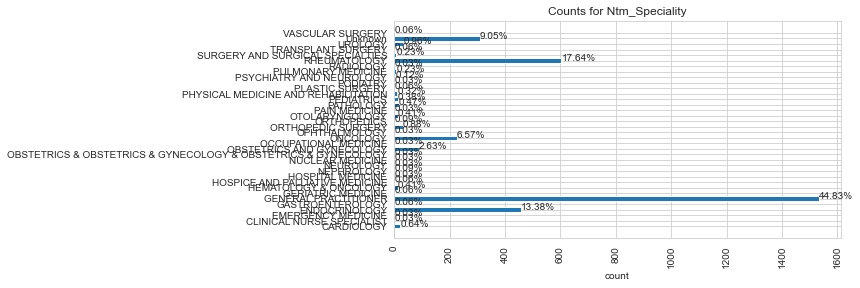

Ntm_Specialist_Flag


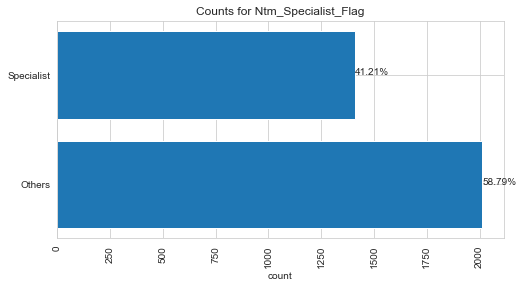

Ntm_Speciality_Bucket


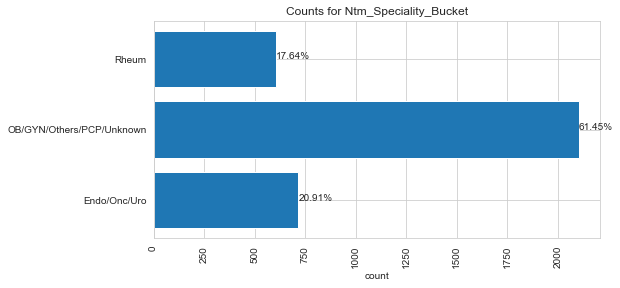

Gluco_Record_Prior_Ntm


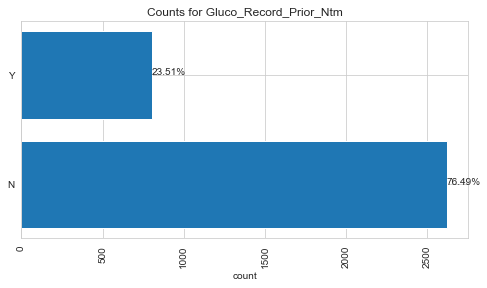

Gluco_Record_During_Rx


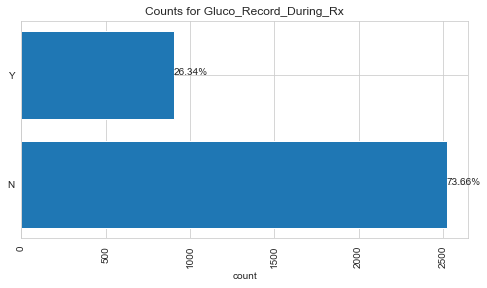

Dexa_During_Rx


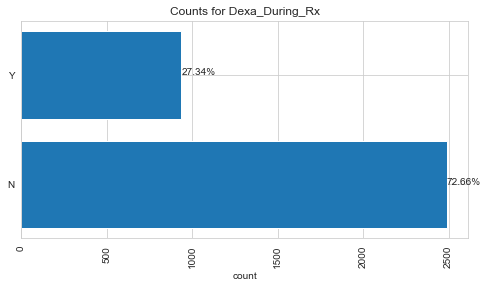

Frag_Frac_Prior_Ntm


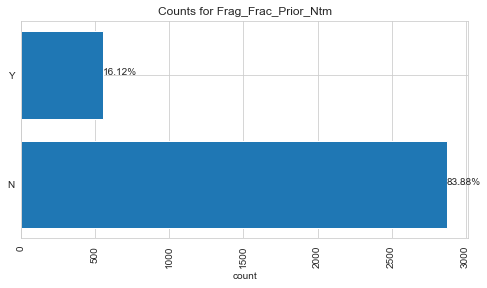

Frag_Frac_During_Rx


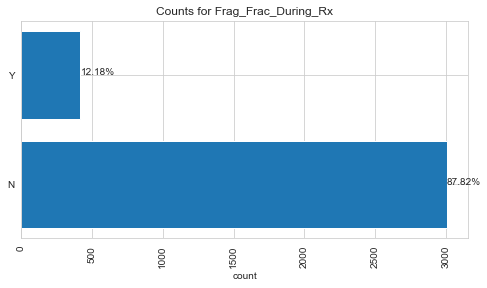

Risk_Segment_Prior_Ntm


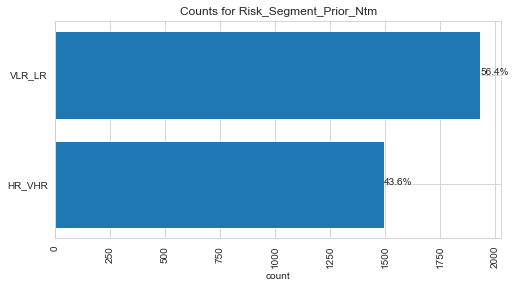

Tscore_Bucket_Prior_Ntm


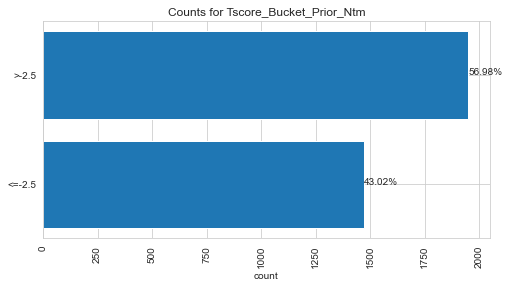

Risk_Segment_During_Rx


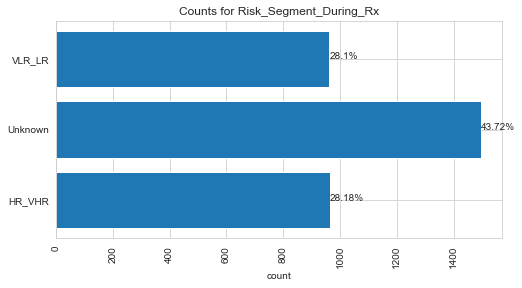

Tscore_Bucket_During_Rx


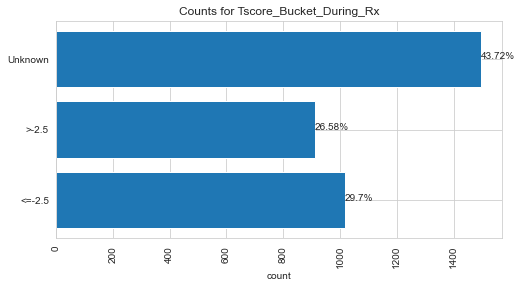

Change_T_Score


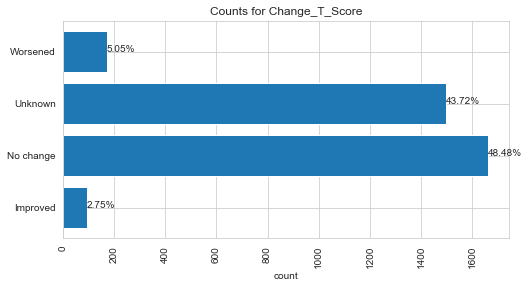

Change_Risk_Segment


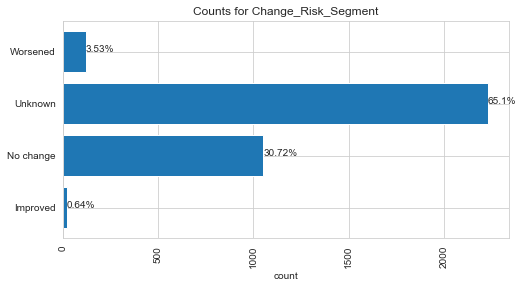

Adherent_Flag


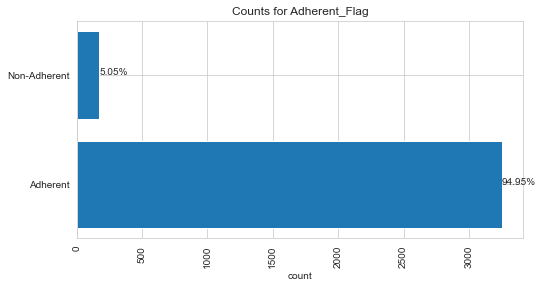

Idn_Indicator


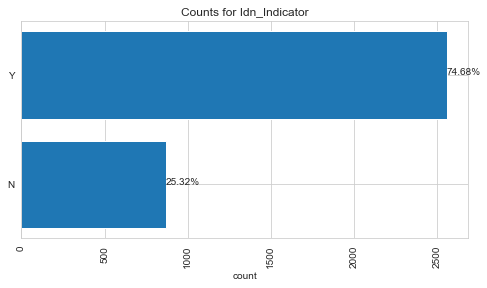

Injectable_Experience_During_Rx


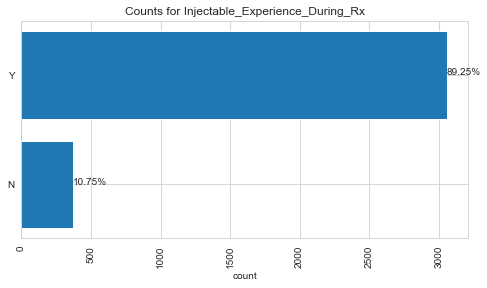

Comorb_Encounter_For_Screening_For_Malignant_Neoplasms


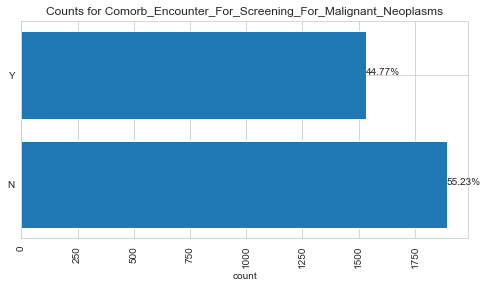

Comorb_Encounter_For_Immunization


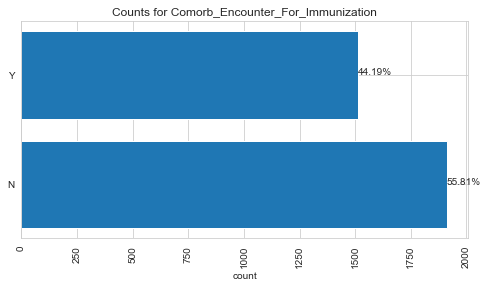

Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx


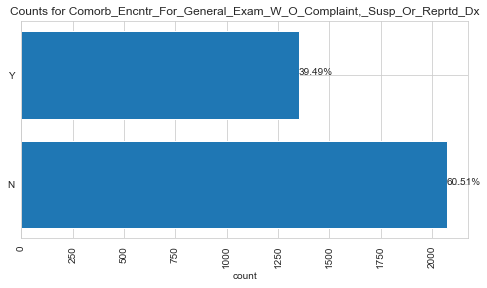

Comorb_Vitamin_D_Deficiency


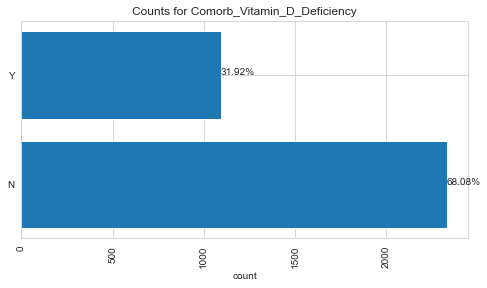

Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified


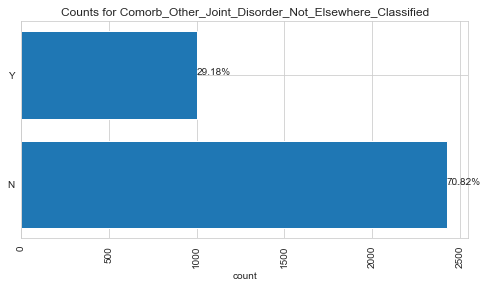

Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx


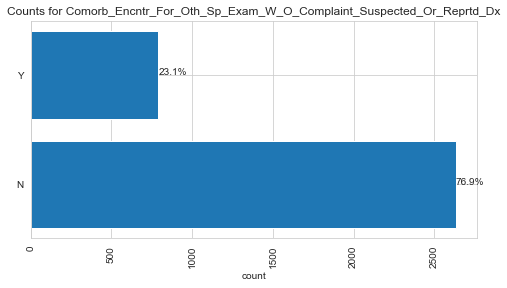

Comorb_Long_Term_Current_Drug_Therapy


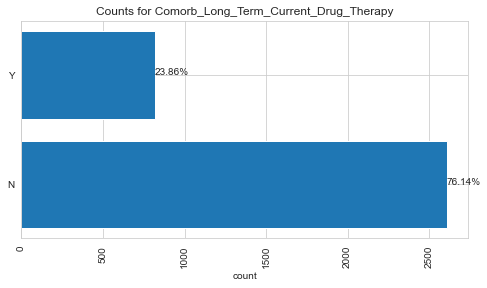

Comorb_Dorsalgia


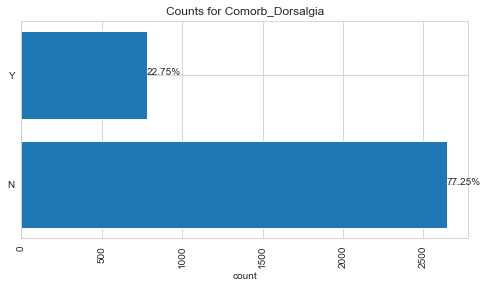

Comorb_Personal_History_Of_Other_Diseases_And_Conditions


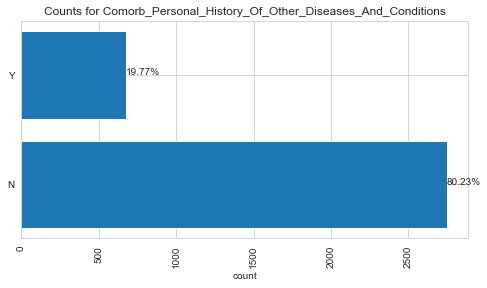

Comorb_Other_Disorders_Of_Bone_Density_And_Structure


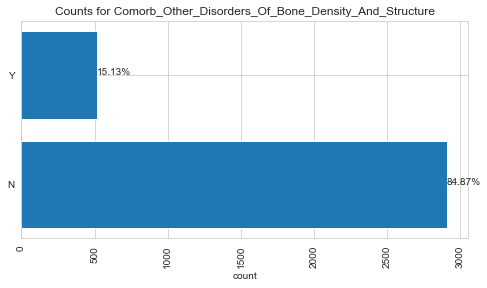

Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias


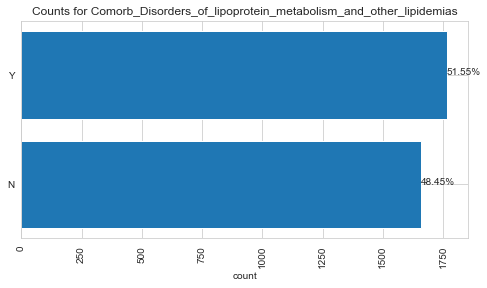

Comorb_Osteoporosis_without_current_pathological_fracture


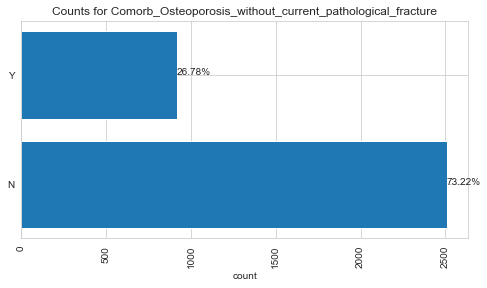

Comorb_Personal_history_of_malignant_neoplasm


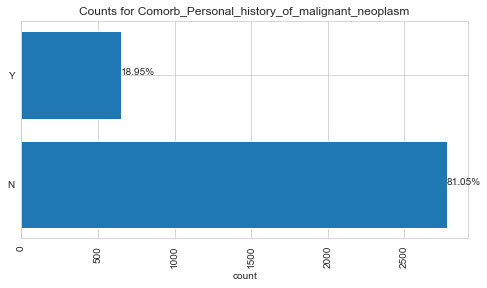

Comorb_Gastro_esophageal_reflux_disease


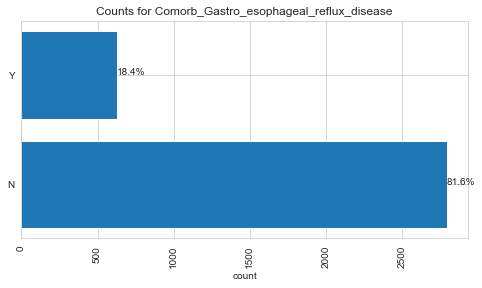

Concom_Cholesterol_And_Triglyceride_Regulating_Preparations


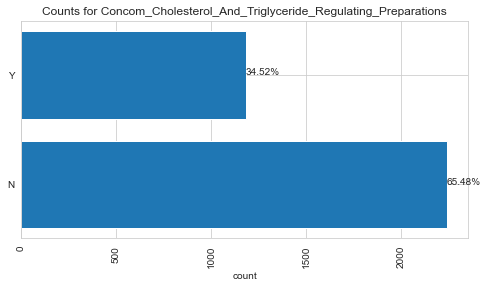

Concom_Narcotics


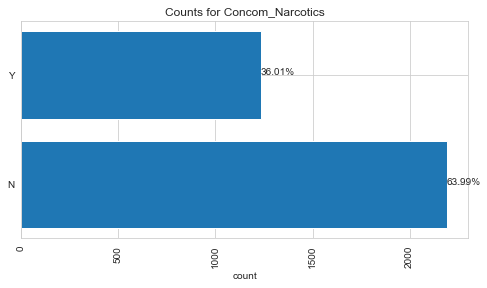

Concom_Systemic_Corticosteroids_Plain


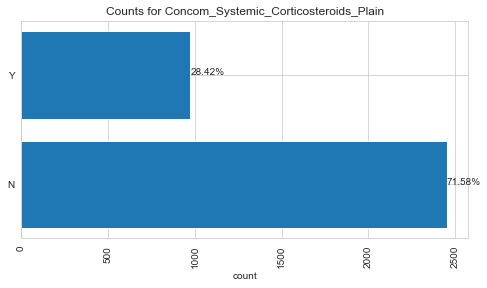

Concom_Anti_Depressants_And_Mood_Stabilisers


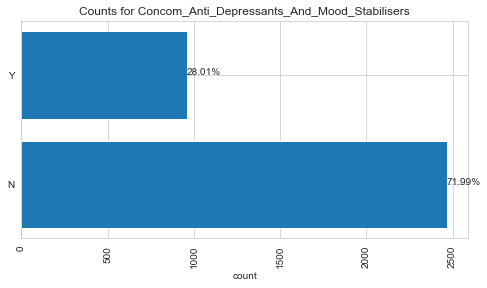

Concom_Fluoroquinolones


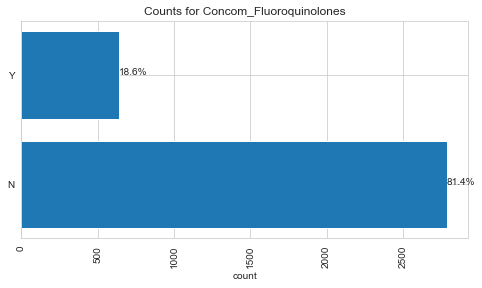

Concom_Cephalosporins


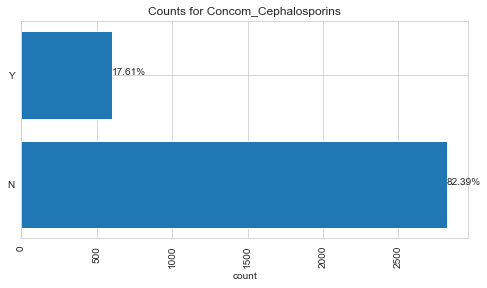

Concom_Macrolides_And_Similar_Types


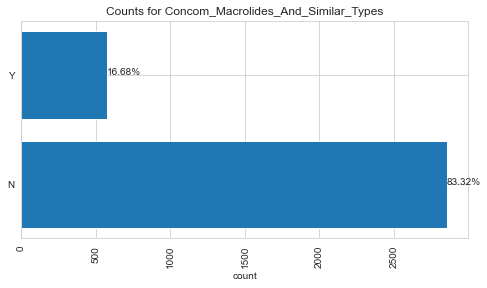

Concom_Broad_Spectrum_Penicillins


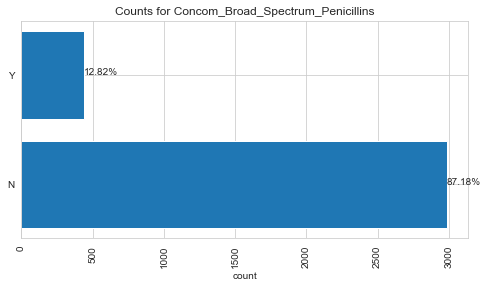

Concom_Anaesthetics_General


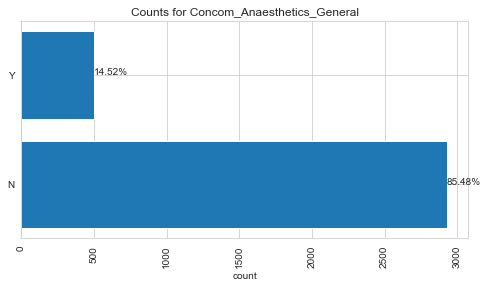

Concom_Viral_Vaccines


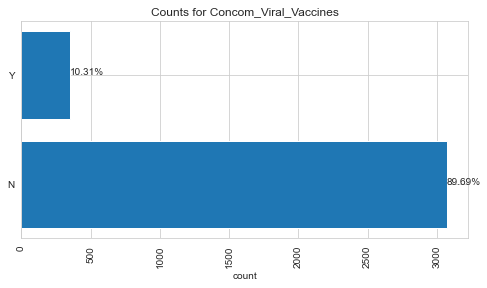

Risk_Type_1_Insulin_Dependent_Diabetes


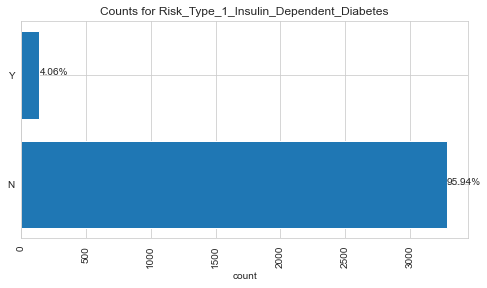

Risk_Osteogenesis_Imperfecta


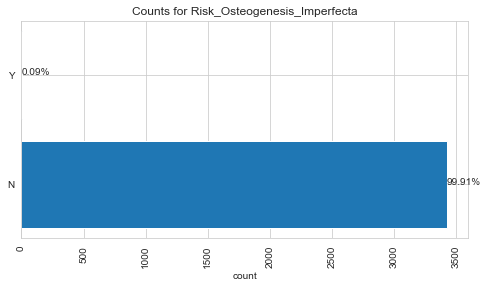

Risk_Rheumatoid_Arthritis


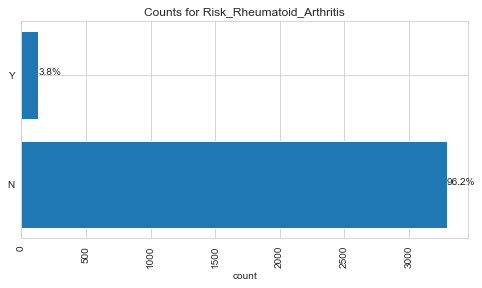

Risk_Untreated_Chronic_Hyperthyroidism


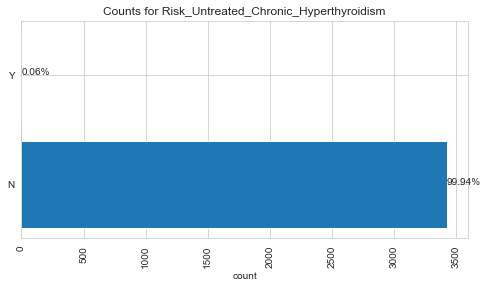

Risk_Untreated_Chronic_Hypogonadism


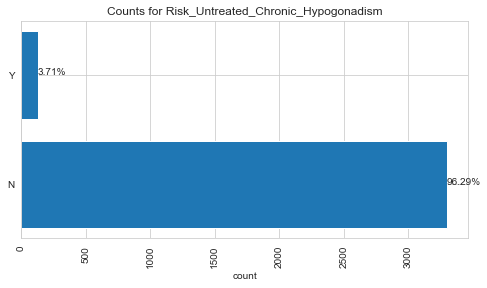

Risk_Untreated_Early_Menopause


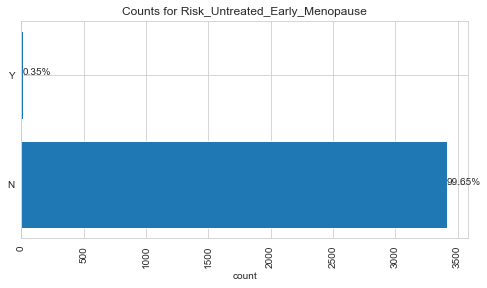

Risk_Patient_Parent_Fractured_Their_Hip


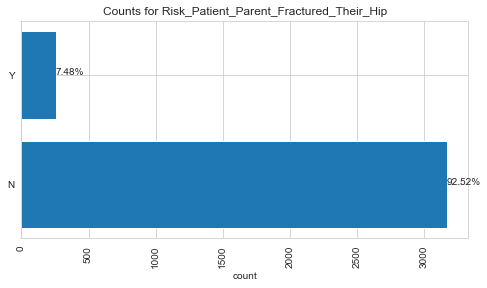

Risk_Smoking_Tobacco


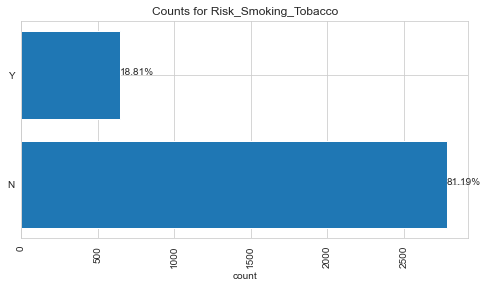

Risk_Chronic_Malnutrition_Or_Malabsorption


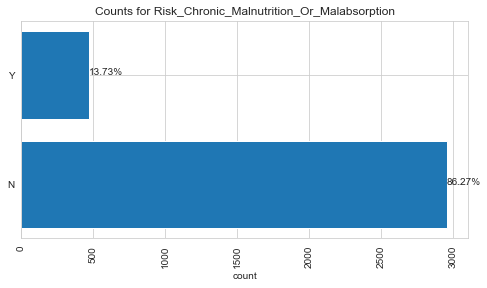

Risk_Chronic_Liver_Disease


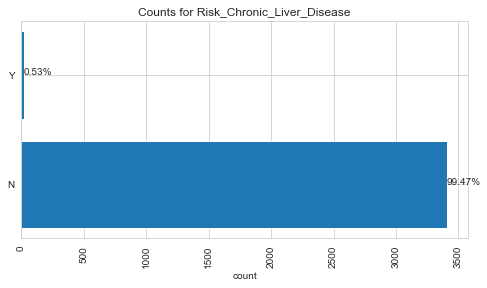

Risk_Family_History_Of_Osteoporosis


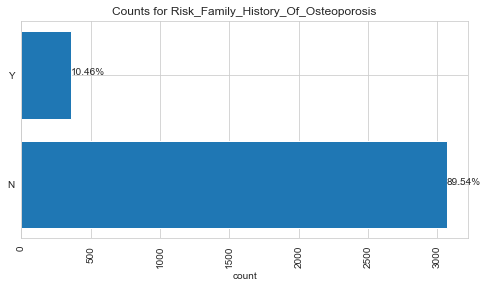

Risk_Low_Calcium_Intake


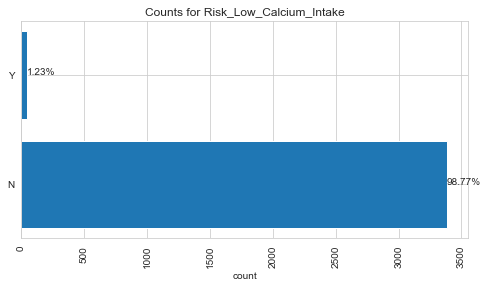

Risk_Vitamin_D_Insufficiency


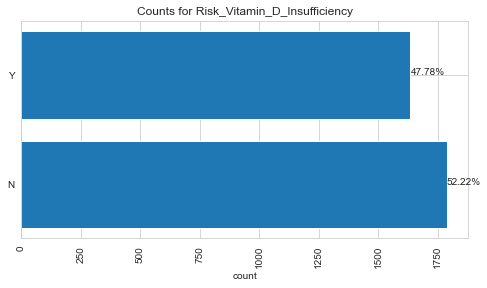

Risk_Poor_Health_Frailty


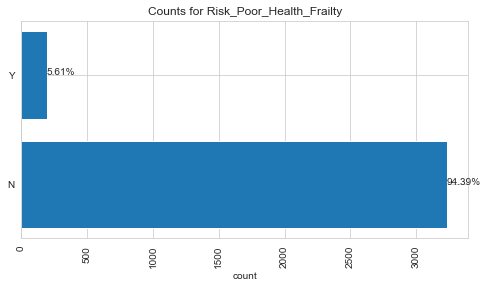

Risk_Excessive_Thinness


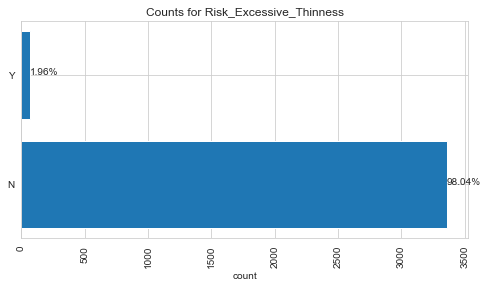

Risk_Hysterectomy_Oophorectomy


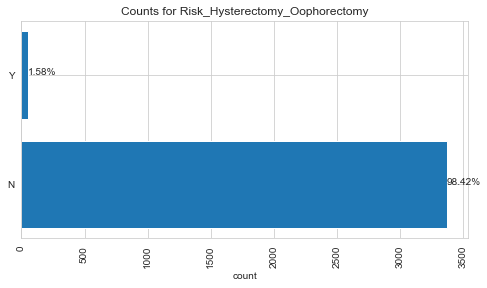

Risk_Estrogen_Deficiency


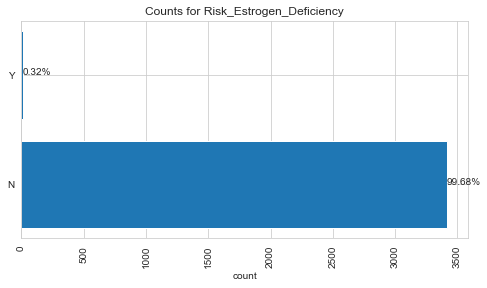

Risk_Immobilization


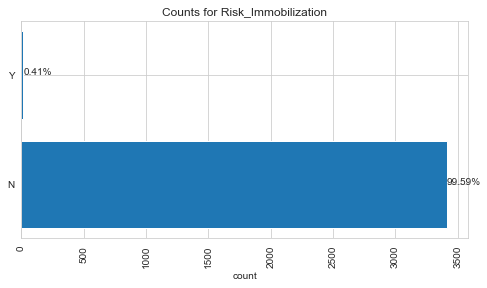

Risk_Recurring_Falls


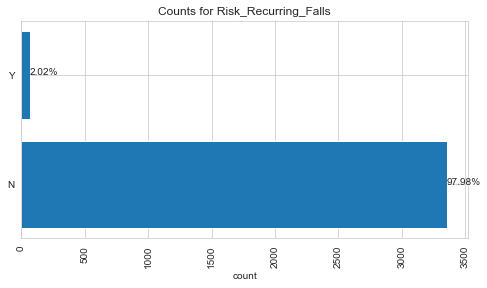

In [42]:
#bar graph for value counts for categorical columns
def plot_catcols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (8,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()
plot_catcols(categorical_features, df)

#Outlier detection and transformation
#Boolean Method

In [21]:
#for Count_Of_Risks, find IQR
Q1 = df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR=Q3-Q1
IQR

3.0

In [22]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df['Dexa_Freq_During_Rx'] > (Q3 + 1.5 * IQR))
mask_high

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: bool

In [23]:
mask_high.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: bool>

In [24]:
#This will return the sum of the high outliers in column.
df.Dexa_Freq_During_Rx[mask_high] = (Q3 + 1.5 * IQR)

<ipython-input-24-84ef8848a6f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dexa_Freq_During_Rx[mask_high] = (Q3 + 1.5 * IQR)


In [25]:
#find and change the values of the high outliers,this is call capping 
df.Dexa_Freq_During_Rx[mask_high]

32      7.5
33      7.5
62      7.5
65      7.5
89      7.5
       ... 
3384    7.5
3396    7.5
3400    7.5
3411    7.5
3414    7.5
Name: Dexa_Freq_During_Rx, Length: 460, dtype: float64

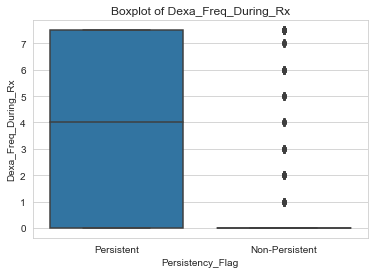

In [26]:
#Boxplot to check the outliers
sns.set_style('whitegrid')
sns.boxplot(x='Persistency_Flag', y='Dexa_Freq_During_Rx', data=df)
plt.title('Boxplot of Dexa_Freq_During_Rx')
plt.ylabel('Dexa_Freq_During_Rx') 
plt.show()

In [27]:
#for Count_Of_Risks, find IQR
Q1 = df['Count_Of_Risks'].quantile(0.25)
Q3 = df['Count_Of_Risks'].quantile(0.75)
IQR=Q3-Q1
IQR

2.0

In [28]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df['Count_Of_Risks'] > (Q3 + 1.5 * IQR))
mask_high

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Count_Of_Risks, Length: 3424, dtype: bool

In [29]:
mask_high.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Count_Of_Risks, Length: 3424, dtype: bool>

In [30]:
#This will return the sum of the high outliers in column.
df.Count_Of_Risks[mask_high] = (Q3 + 1.5 * IQR)

<ipython-input-30-368489247ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Count_Of_Risks[mask_high] = (Q3 + 1.5 * IQR)


In [31]:
##find and change the values of the high outliers,this is call capping 
df.Count_Of_Risks[mask_high]

342     5
817     5
1059    5
2601    5
2860    5
3045    5
3146    5
3340    5
Name: Count_Of_Risks, dtype: int64

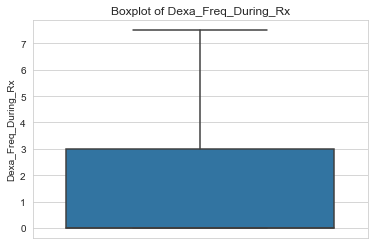

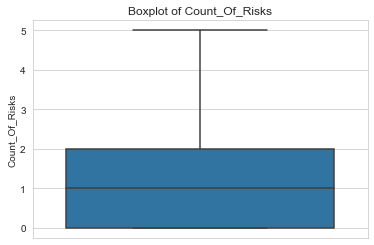

In [38]:
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, numerical_features)

In [33]:
#Checking the changes in the numerical values after transformation
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,1.692465,1.236565
std,2.908085,1.082944
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,7.500000,5.000000


Treatment of skewed data

array([[<AxesSubplot:title={'center':'Dexa_Freq_During_Rx'}>,
        <AxesSubplot:title={'center':'Count_Of_Risks'}>]], dtype=object)

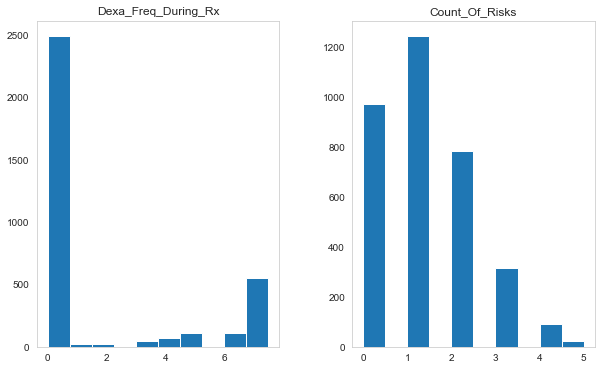

In [34]:
#Histogram of the numerical data to check skew
df.hist(grid=False,
       figsize=(10, 6),
       bins=10)

In [35]:
#skew and kurtosis values after treating outliers
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,1.254572,-0.260917
Count_Of_Risks,0.778326,0.300433


sqrt_Dexa_Freq_During_Rx
                              skew  kurtosis
sqrt_Dexa_Freq_During_Rx  1.117652 -0.660616


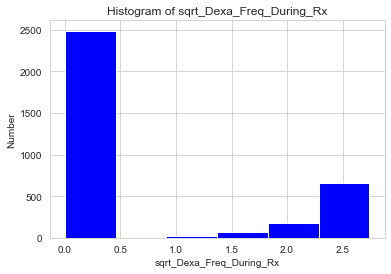

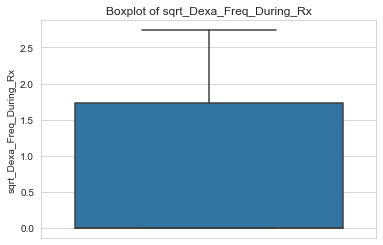

sqrt_Count_Of_Risks
                         skew  kurtosis
sqrt_Count_Of_Risks -0.342536  -1.07078


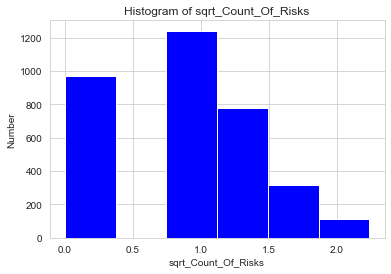

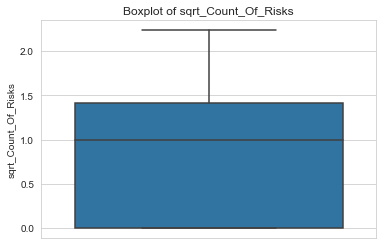

In [39]:
# square root transformation
for col in numerical_features:
    df['sqrt_'+col] = np.sqrt(df[col])
    measure_skew_kurtosis(['sqrt_'+col]) #measure skewness and kurtosis
    plot_histogram(df, ['sqrt_'+col]) # plot histogram
    boxplot(df, ['sqrt_'+col])#plot a box plot

In [40]:
#Checking skew after transformation
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,1.254572,-0.260917
Count_Of_Risks,0.778326,0.300433
sqrt_Dexa_Freq_During_Rx,1.117652,-0.660616
sqrt_Count_Of_Risks,-0.342536,-1.070780


EDA

In [45]:
# removing persistency flag form categorical columns
categorical_features.remove('Persistency_Flag')

 
Gender
 


,Persistency_Flag,Gender,dummy
0,Non-Persistent,Female,2018
1,Non-Persistent,Male,117
2,Persistent,Female,1212
3,Persistent,Male,77


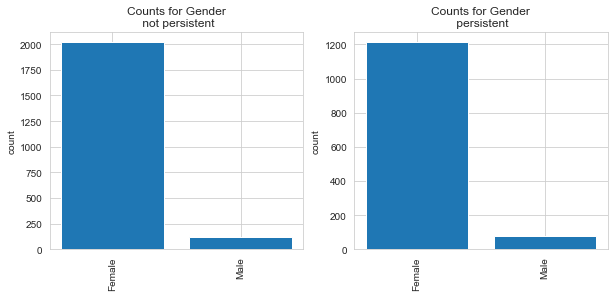

 
Race
 


,Persistency_Flag,Race,dummy
0,Non-Persistent,African American,65
1,Non-Persistent,Asian,43
2,Non-Persistent,Caucasian,1963
3,Non-Persistent,Other/Unknown,64
4,Persistent,African American,30
5,Persistent,Asian,41
6,Persistent,Caucasian,1185
7,Persistent,Other/Unknown,33


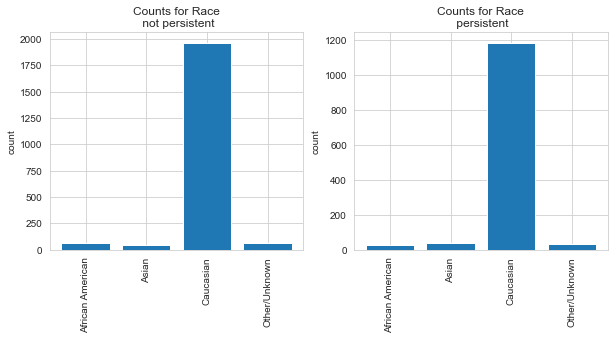

 
Ethnicity
 


,Persistency_Flag,Ethnicity,dummy
0,Non-Persistent,Hispanic,66
1,Non-Persistent,Not Hispanic,2008
2,Non-Persistent,Unknown,61
3,Persistent,Hispanic,32
4,Persistent,Not Hispanic,1227
5,Persistent,Unknown,30


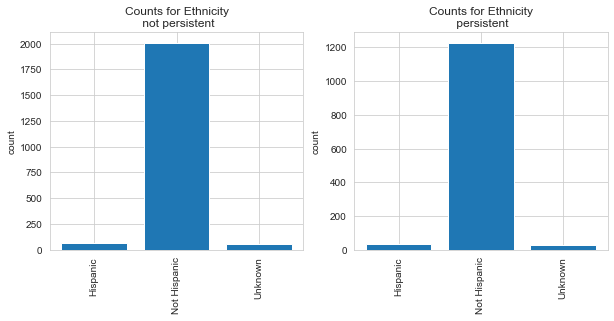

 
Region
 


,Persistency_Flag,Region,dummy
0,Non-Persistent,Midwest,934
1,Non-Persistent,Northeast,134
2,Non-Persistent,Other/Unknown,35
3,Non-Persistent,South,753
4,Non-Persistent,West,279
5,Persistent,Midwest,449
6,Persistent,Northeast,98
7,Persistent,Other/Unknown,25
8,Persistent,South,494
9,Persistent,West,223


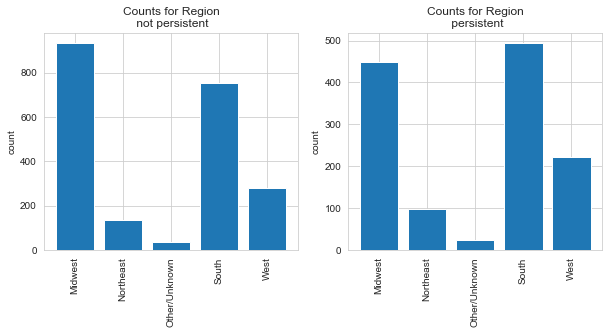

 
Age_Bucket
 


,Persistency_Flag,Age_Bucket,dummy
0,Non-Persistent,55-65,472
1,Non-Persistent,65-75,653
2,Non-Persistent,<55,103
3,Non-Persistent,>75,907
4,Persistent,55-65,261
5,Persistent,65-75,433
6,Persistent,<55,63
7,Persistent,>75,532


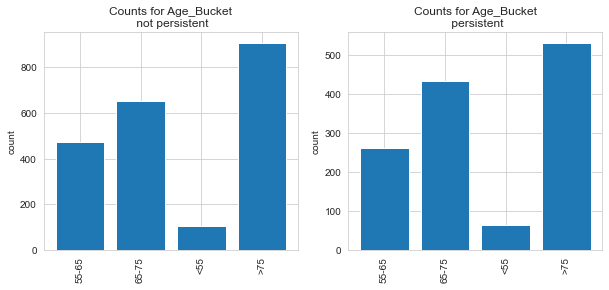

 
Ntm_Speciality
 


,Persistency_Flag,Ntm_Speciality,dummy
0,Non-Persistent,CARDIOLOGY,22
1,Non-Persistent,CLINICAL NURSE SPECIALIST,1
2,Non-Persistent,EMERGENCY MEDICINE,1
3,Non-Persistent,ENDOCRINOLOGY,231
4,Non-Persistent,GASTROENTEROLOGY,2
5,Non-Persistent,GENERAL PRACTITIONER,1041
6,Non-Persistent,GERIATRIC MEDICINE,2
7,Non-Persistent,HEMATOLOGY & ONCOLOGY,8
8,Non-Persistent,HOSPICE AND PALLIATIVE MEDICINE,1
9,Non-Persistent,HOSPITAL MEDICINE,1


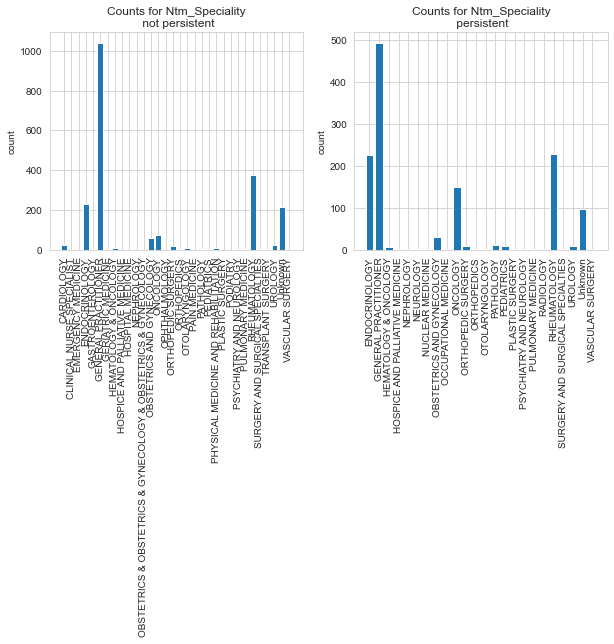

 
Ntm_Specialist_Flag
 


,Persistency_Flag,Ntm_Specialist_Flag,dummy
0,Non-Persistent,Others,1369
1,Non-Persistent,Specialist,766
2,Persistent,Others,644
3,Persistent,Specialist,645


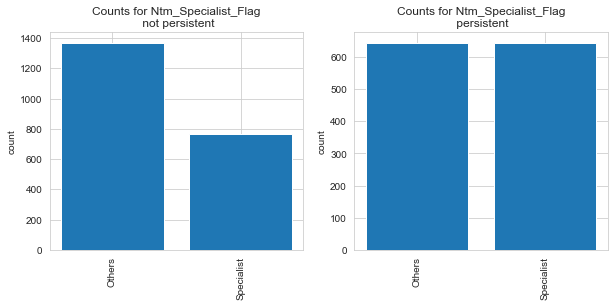

 
Ntm_Speciality_Bucket
 


,Persistency_Flag,Ntm_Speciality_Bucket,dummy
0,Non-Persistent,Endo/Onc/Uro,330
1,Non-Persistent,OB/GYN/Others/PCP/Unknown,1429
2,Non-Persistent,Rheum,376
3,Persistent,Endo/Onc/Uro,386
4,Persistent,OB/GYN/Others/PCP/Unknown,675
5,Persistent,Rheum,228


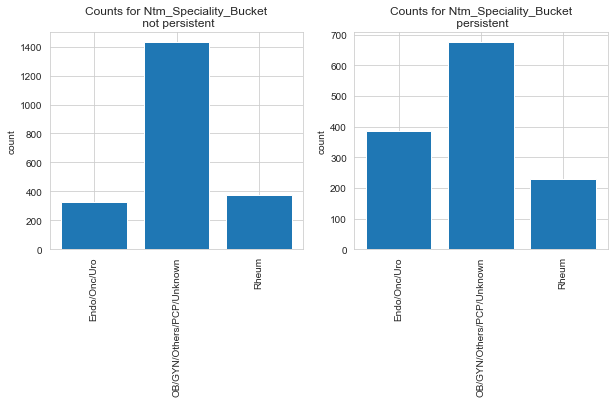

 
Gluco_Record_Prior_Ntm
 


,Persistency_Flag,Gluco_Record_Prior_Ntm,dummy
0,Non-Persistent,N,1629
1,Non-Persistent,Y,506
2,Persistent,N,990
3,Persistent,Y,299


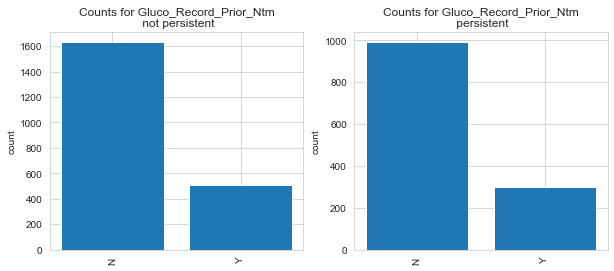

 
Gluco_Record_During_Rx
 


,Persistency_Flag,Gluco_Record_During_Rx,dummy
0,Non-Persistent,N,1728
1,Non-Persistent,Y,407
2,Persistent,N,794
3,Persistent,Y,495


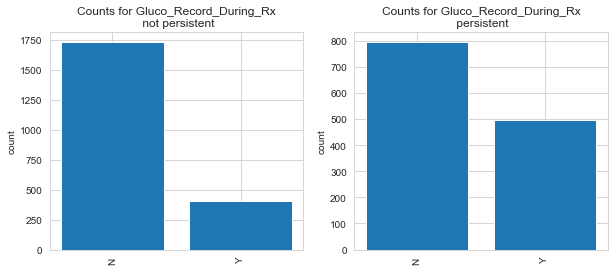

 
Dexa_During_Rx
 


,Persistency_Flag,Dexa_During_Rx,dummy
0,Non-Persistent,N,1915
1,Non-Persistent,Y,220
2,Persistent,N,573
3,Persistent,Y,716


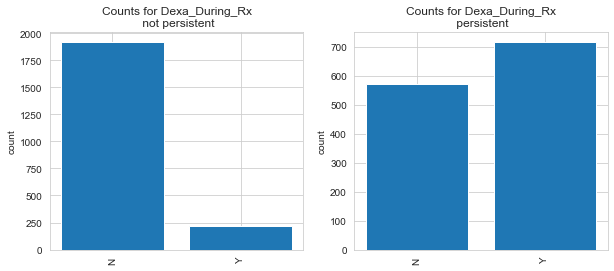

 
Frag_Frac_Prior_Ntm
 


,Persistency_Flag,Frag_Frac_Prior_Ntm,dummy
0,Non-Persistent,N,1791
1,Non-Persistent,Y,344
2,Persistent,N,1081
3,Persistent,Y,208


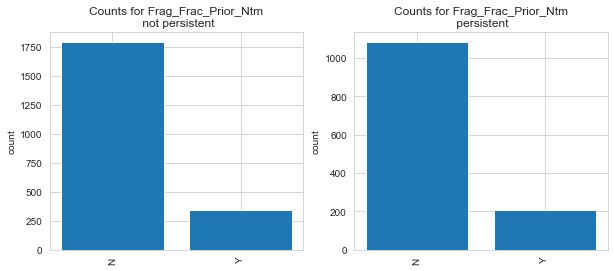

 
Frag_Frac_During_Rx
 


,Persistency_Flag,Frag_Frac_During_Rx,dummy
0,Non-Persistent,N,1933
1,Non-Persistent,Y,202
2,Persistent,N,1074
3,Persistent,Y,215


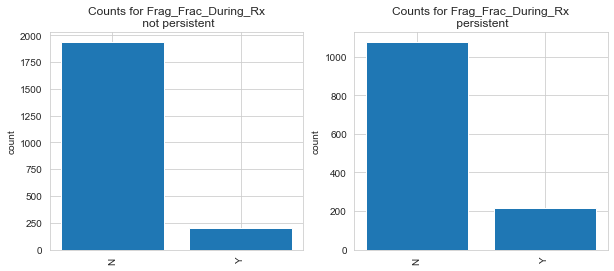

 
Risk_Segment_Prior_Ntm
 


,Persistency_Flag,Risk_Segment_Prior_Ntm,dummy
0,Non-Persistent,HR_VHR,941
1,Non-Persistent,VLR_LR,1194
2,Persistent,HR_VHR,552
3,Persistent,VLR_LR,737


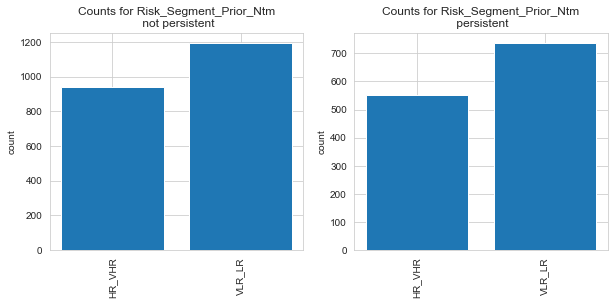

 
Tscore_Bucket_Prior_Ntm
 


,Persistency_Flag,Tscore_Bucket_Prior_Ntm,dummy
0,Non-Persistent,<=-2.5,934
1,Non-Persistent,>-2.5,1201
2,Persistent,<=-2.5,539
3,Persistent,>-2.5,750


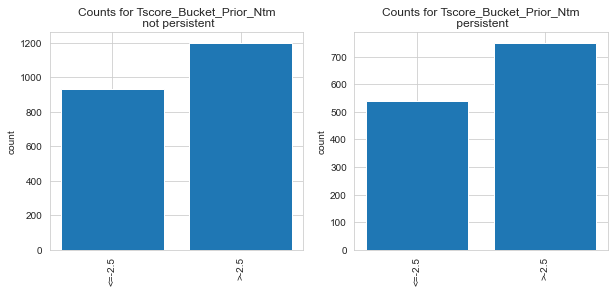

 
Risk_Segment_During_Rx
 


,Persistency_Flag,Risk_Segment_During_Rx,dummy
0,Non-Persistent,HR_VHR,527
1,Non-Persistent,Unknown,1082
2,Non-Persistent,VLR_LR,526
3,Persistent,HR_VHR,438
4,Persistent,Unknown,415
5,Persistent,VLR_LR,436


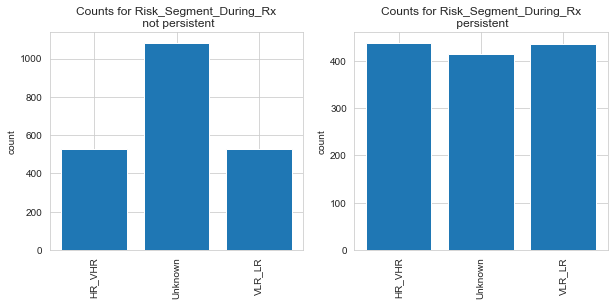

 
Tscore_Bucket_During_Rx
 


,Persistency_Flag,Tscore_Bucket_During_Rx,dummy
0,Non-Persistent,<=-2.5,570
1,Non-Persistent,>-2.5,483
2,Non-Persistent,Unknown,1082
3,Persistent,<=-2.5,447
4,Persistent,>-2.5,427
5,Persistent,Unknown,415


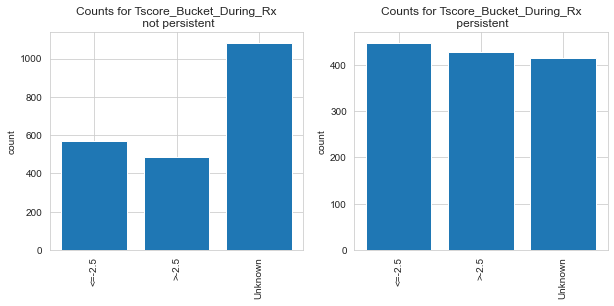

 
Change_T_Score
 


,Persistency_Flag,Change_T_Score,dummy
0,Non-Persistent,Improved,28
1,Non-Persistent,No change,959
2,Non-Persistent,Unknown,1082
3,Non-Persistent,Worsened,66
4,Persistent,Improved,66
5,Persistent,No change,701
6,Persistent,Unknown,415
7,Persistent,Worsened,107


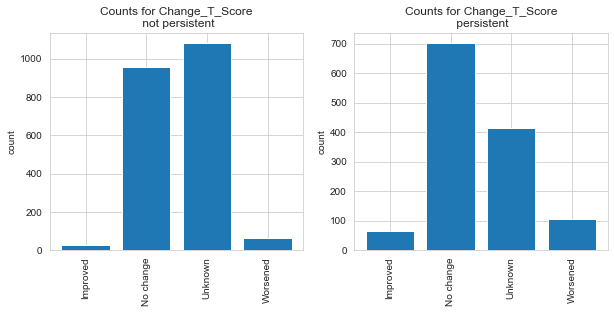

 
Change_Risk_Segment
 


,Persistency_Flag,Change_Risk_Segment,dummy
0,Non-Persistent,Improved,9
1,Non-Persistent,No change,621
2,Non-Persistent,Unknown,1457
3,Non-Persistent,Worsened,48
4,Persistent,Improved,13
5,Persistent,No change,431
6,Persistent,Unknown,772
7,Persistent,Worsened,73


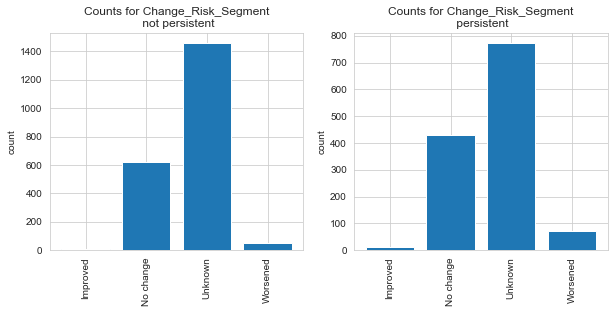

 
Adherent_Flag
 


,Persistency_Flag,Adherent_Flag,dummy
0,Non-Persistent,Adherent,2068
1,Non-Persistent,Non-Adherent,67
2,Persistent,Adherent,1183
3,Persistent,Non-Adherent,106


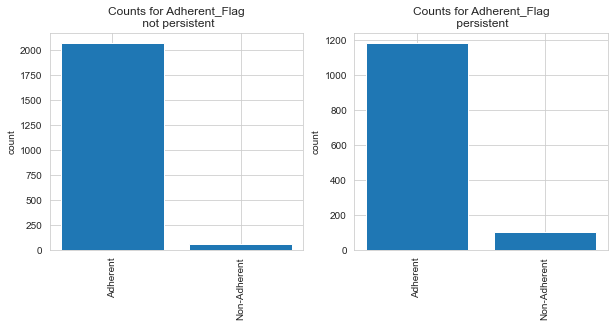

 
Idn_Indicator
 


,Persistency_Flag,Idn_Indicator,dummy
0,Non-Persistent,N,621
1,Non-Persistent,Y,1514
2,Persistent,N,246
3,Persistent,Y,1043


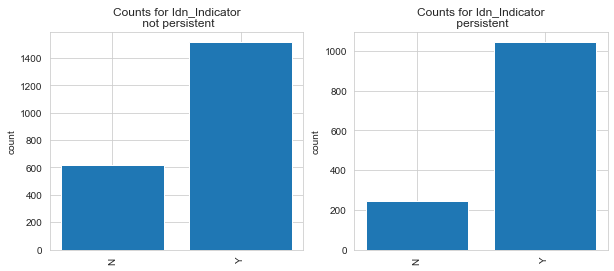

 
Injectable_Experience_During_Rx
 


,Persistency_Flag,Injectable_Experience_During_Rx,dummy
0,Non-Persistent,N,280
1,Non-Persistent,Y,1855
2,Persistent,N,88
3,Persistent,Y,1201


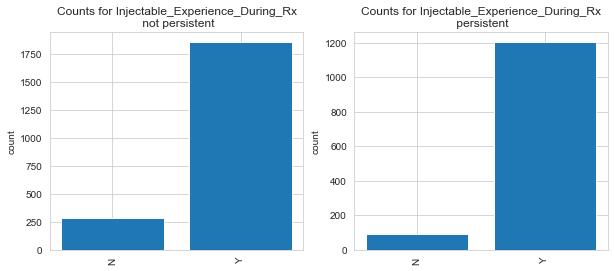

 
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms
 


,Persistency_Flag,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,dummy
0,Non-Persistent,N,1445
1,Non-Persistent,Y,690
2,Persistent,N,446
3,Persistent,Y,843


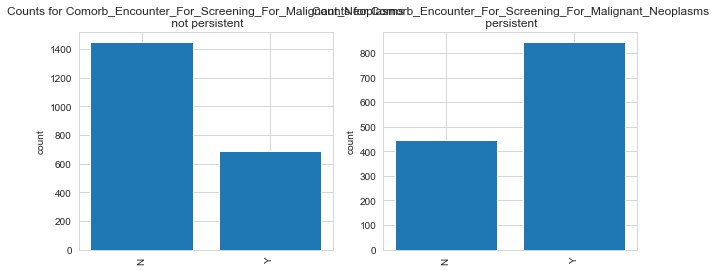

 
Comorb_Encounter_For_Immunization
 


,Persistency_Flag,Comorb_Encounter_For_Immunization,dummy
0,Non-Persistent,N,1451
1,Non-Persistent,Y,684
2,Persistent,N,460
3,Persistent,Y,829


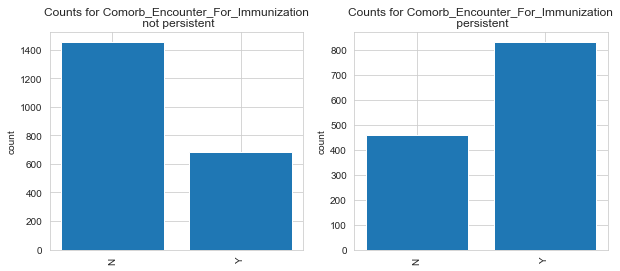

 
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx
 


,Persistency_Flag,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",dummy
0,Non-Persistent,N,1527
1,Non-Persistent,Y,608
2,Persistent,N,545
3,Persistent,Y,744


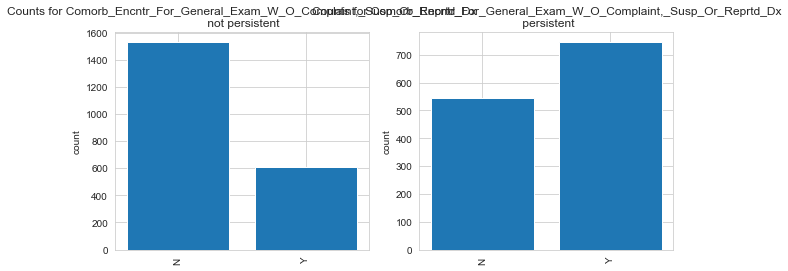

 
Comorb_Vitamin_D_Deficiency
 


,Persistency_Flag,Comorb_Vitamin_D_Deficiency,dummy
0,Non-Persistent,N,1587
1,Non-Persistent,Y,548
2,Persistent,N,744
3,Persistent,Y,545


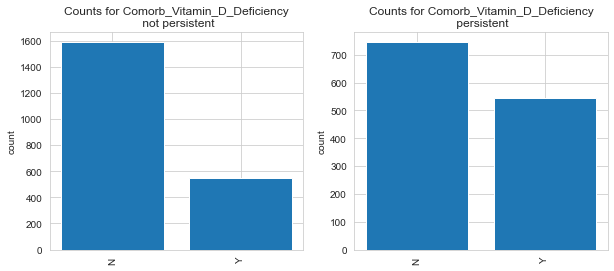

 
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified
 


,Persistency_Flag,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,dummy
0,Non-Persistent,N,1688
1,Non-Persistent,Y,447
2,Persistent,N,737
3,Persistent,Y,552


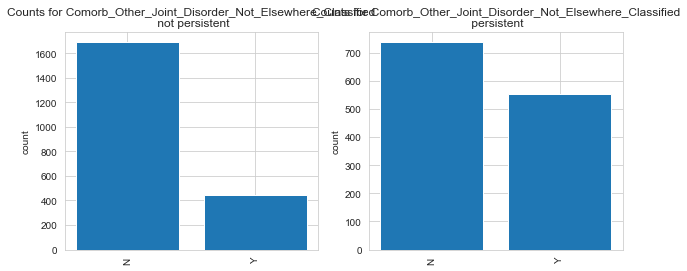

 
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx
 


,Persistency_Flag,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,dummy
0,Non-Persistent,N,1791
1,Non-Persistent,Y,344
2,Persistent,N,842
3,Persistent,Y,447


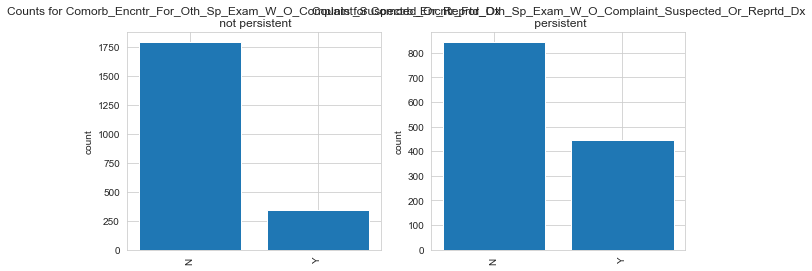

 
Comorb_Long_Term_Current_Drug_Therapy
 


,Persistency_Flag,Comorb_Long_Term_Current_Drug_Therapy,dummy
0,Non-Persistent,N,1875
1,Non-Persistent,Y,260
2,Persistent,N,732
3,Persistent,Y,557


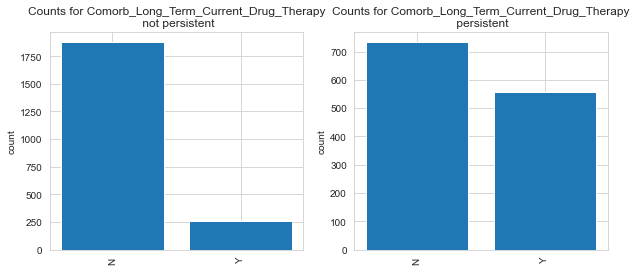

 
Comorb_Dorsalgia
 


,Persistency_Flag,Comorb_Dorsalgia,dummy
0,Non-Persistent,N,1799
1,Non-Persistent,Y,336
2,Persistent,N,846
3,Persistent,Y,443


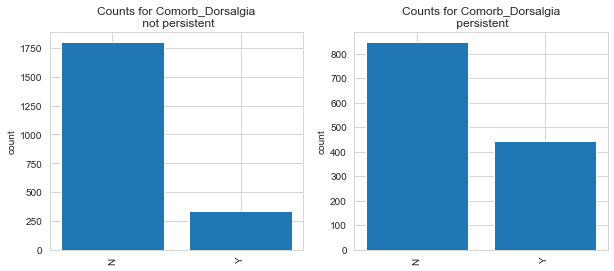

 
Comorb_Personal_History_Of_Other_Diseases_And_Conditions
 


,Persistency_Flag,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,dummy
0,Non-Persistent,N,1858
1,Non-Persistent,Y,277
2,Persistent,N,889
3,Persistent,Y,400


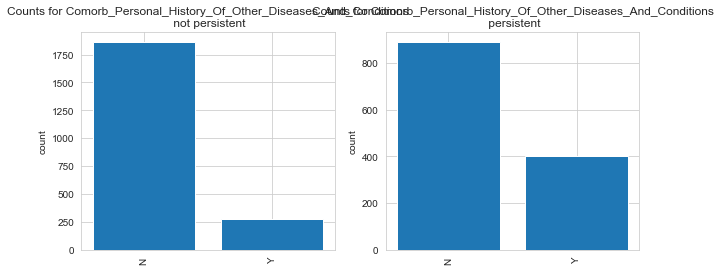

 
Comorb_Other_Disorders_Of_Bone_Density_And_Structure
 


,Persistency_Flag,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,dummy
0,Non-Persistent,N,1959
1,Non-Persistent,Y,176
2,Persistent,N,947
3,Persistent,Y,342


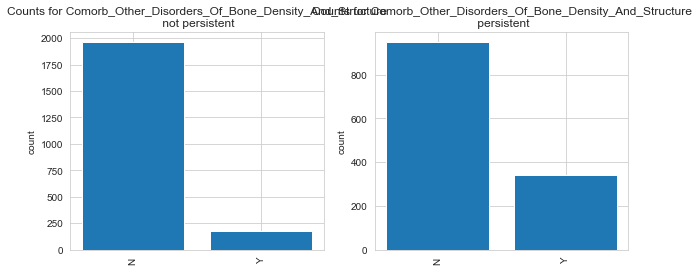

 
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias
 


,Persistency_Flag,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,dummy
0,Non-Persistent,N,1170
1,Non-Persistent,Y,965
2,Persistent,N,489
3,Persistent,Y,800


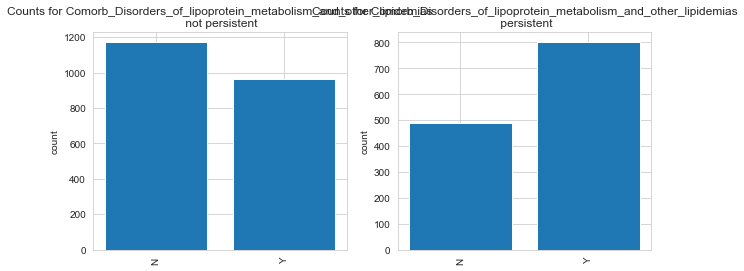

 
Comorb_Osteoporosis_without_current_pathological_fracture
 


,Persistency_Flag,Comorb_Osteoporosis_without_current_pathological_fracture,dummy
0,Non-Persistent,N,1666
1,Non-Persistent,Y,469
2,Persistent,N,841
3,Persistent,Y,448


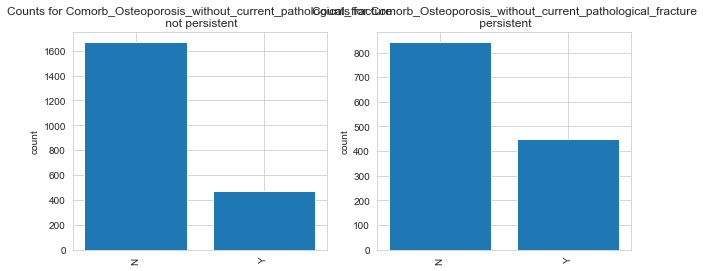

 
Comorb_Personal_history_of_malignant_neoplasm
 


,Persistency_Flag,Comorb_Personal_history_of_malignant_neoplasm,dummy
0,Non-Persistent,N,1844
1,Non-Persistent,Y,291
2,Persistent,N,931
3,Persistent,Y,358


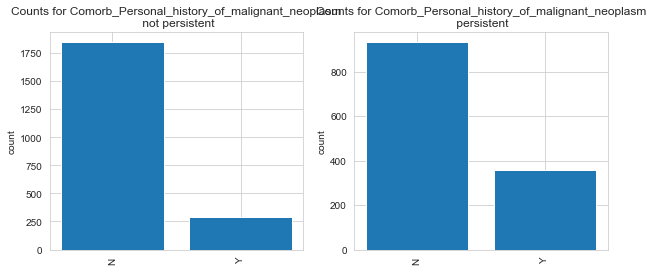

 
Comorb_Gastro_esophageal_reflux_disease
 


,Persistency_Flag,Comorb_Gastro_esophageal_reflux_disease,dummy
0,Non-Persistent,N,1884
1,Non-Persistent,Y,251
2,Persistent,N,910
3,Persistent,Y,379


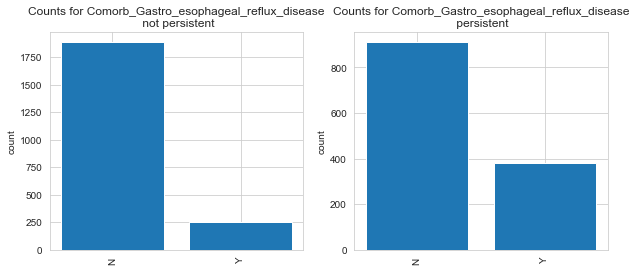

 
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
 


,Persistency_Flag,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,dummy
0,Non-Persistent,N,1497
1,Non-Persistent,Y,638
2,Persistent,N,745
3,Persistent,Y,544


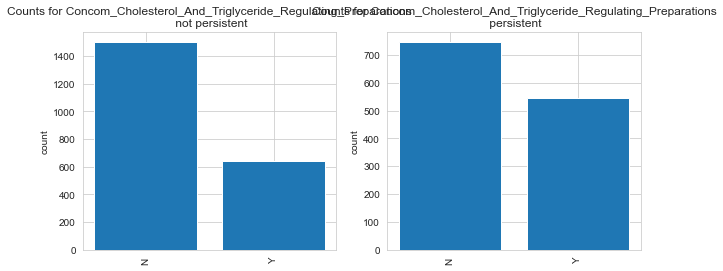

 
Concom_Narcotics
 


,Persistency_Flag,Concom_Narcotics,dummy
0,Non-Persistent,N,1519
1,Non-Persistent,Y,616
2,Persistent,N,672
3,Persistent,Y,617


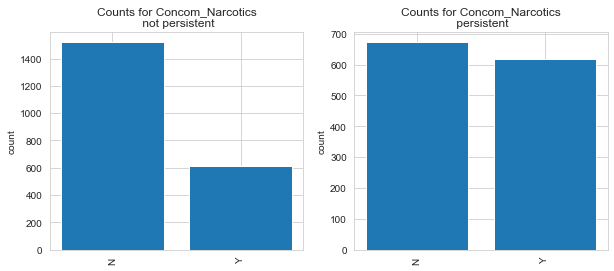

 
Concom_Systemic_Corticosteroids_Plain
 


,Persistency_Flag,Concom_Systemic_Corticosteroids_Plain,dummy
0,Non-Persistent,N,1710
1,Non-Persistent,Y,425
2,Persistent,N,741
3,Persistent,Y,548


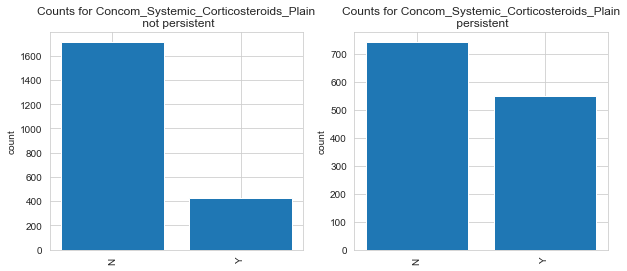

 
Concom_Anti_Depressants_And_Mood_Stabilisers
 


,Persistency_Flag,Concom_Anti_Depressants_And_Mood_Stabilisers,dummy
0,Non-Persistent,N,1619
1,Non-Persistent,Y,516
2,Persistent,N,846
3,Persistent,Y,443


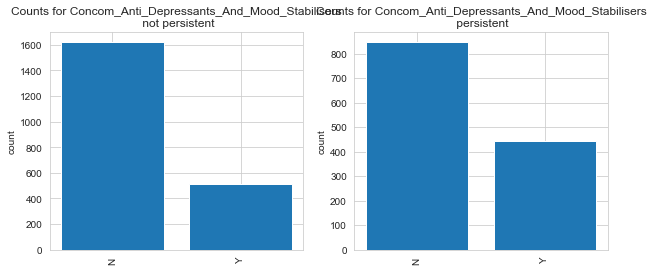

 
Concom_Fluoroquinolones
 


,Persistency_Flag,Concom_Fluoroquinolones,dummy
0,Non-Persistent,N,1858
1,Non-Persistent,Y,277
2,Persistent,N,929
3,Persistent,Y,360


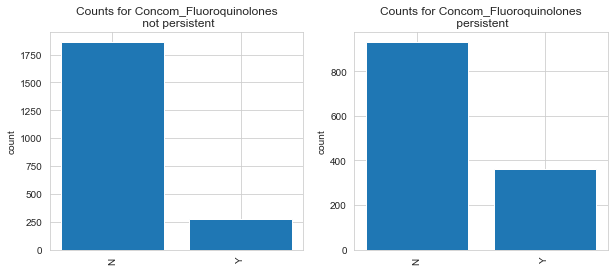

 
Concom_Cephalosporins
 


,Persistency_Flag,Concom_Cephalosporins,dummy
0,Non-Persistent,N,1899
1,Non-Persistent,Y,236
2,Persistent,N,922
3,Persistent,Y,367


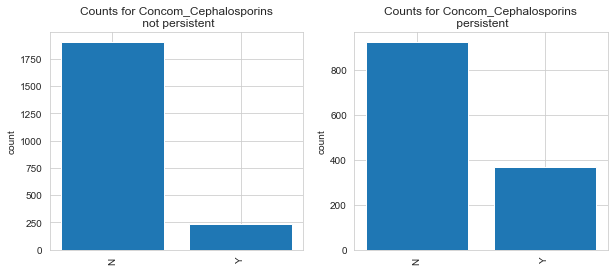

 
Concom_Macrolides_And_Similar_Types
 


,Persistency_Flag,Concom_Macrolides_And_Similar_Types,dummy
0,Non-Persistent,N,1916
1,Non-Persistent,Y,219
2,Persistent,N,937
3,Persistent,Y,352


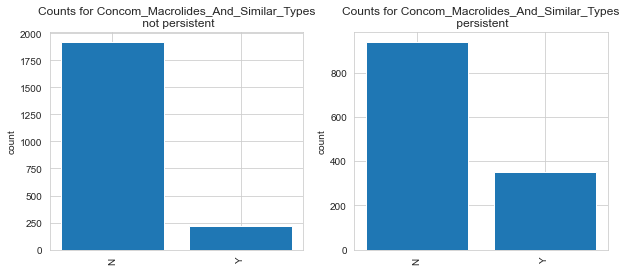

 
Concom_Broad_Spectrum_Penicillins
 


,Persistency_Flag,Concom_Broad_Spectrum_Penicillins,dummy
0,Non-Persistent,N,1971
1,Non-Persistent,Y,164
2,Persistent,N,1014
3,Persistent,Y,275


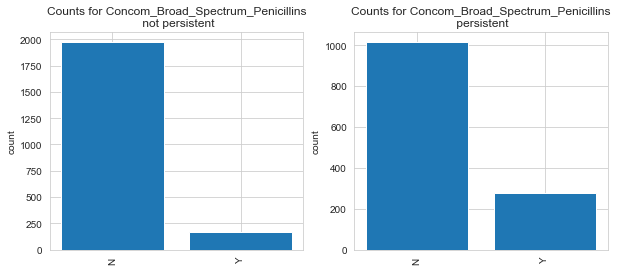

 
Concom_Anaesthetics_General
 


,Persistency_Flag,Concom_Anaesthetics_General,dummy
0,Non-Persistent,N,1955
1,Non-Persistent,Y,180
2,Persistent,N,972
3,Persistent,Y,317


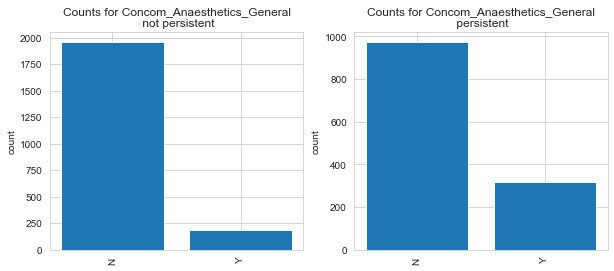

 
Concom_Viral_Vaccines
 


,Persistency_Flag,Concom_Viral_Vaccines,dummy
0,Non-Persistent,N,2027
1,Non-Persistent,Y,108
2,Persistent,N,1044
3,Persistent,Y,245


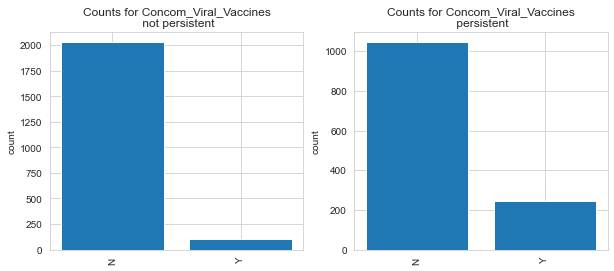

 
Risk_Type_1_Insulin_Dependent_Diabetes
 


,Persistency_Flag,Risk_Type_1_Insulin_Dependent_Diabetes,dummy
0,Non-Persistent,N,2042
1,Non-Persistent,Y,93
2,Persistent,N,1243
3,Persistent,Y,46


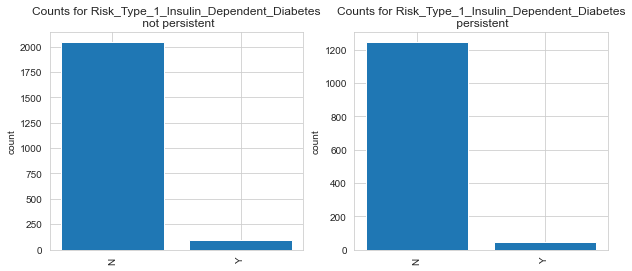

 
Risk_Osteogenesis_Imperfecta
 


,Persistency_Flag,Risk_Osteogenesis_Imperfecta,dummy
0,Non-Persistent,N,2133
1,Non-Persistent,Y,2
2,Persistent,N,1288
3,Persistent,Y,1


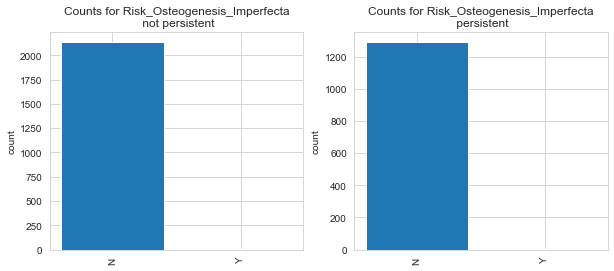

 
Risk_Rheumatoid_Arthritis
 


,Persistency_Flag,Risk_Rheumatoid_Arthritis,dummy
0,Non-Persistent,N,2071
1,Non-Persistent,Y,64
2,Persistent,N,1223
3,Persistent,Y,66


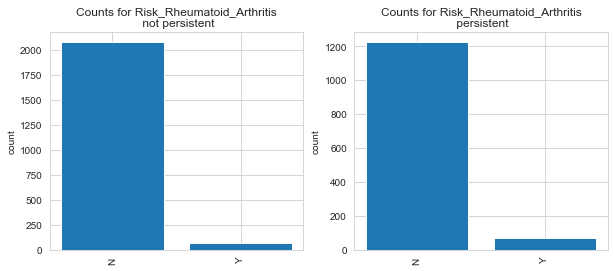

 
Risk_Untreated_Chronic_Hyperthyroidism
 


,Persistency_Flag,Risk_Untreated_Chronic_Hyperthyroidism,dummy
0,Non-Persistent,N,2133
1,Non-Persistent,Y,2
2,Persistent,N,1289


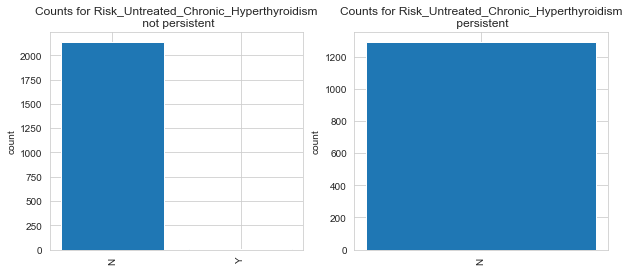

 
Risk_Untreated_Chronic_Hypogonadism
 


,Persistency_Flag,Risk_Untreated_Chronic_Hypogonadism,dummy
0,Non-Persistent,N,2077
1,Non-Persistent,Y,58
2,Persistent,N,1220
3,Persistent,Y,69


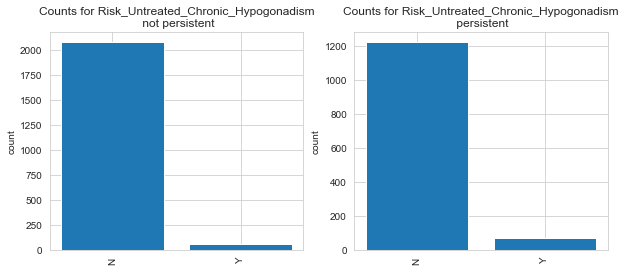

 
Risk_Untreated_Early_Menopause
 


,Persistency_Flag,Risk_Untreated_Early_Menopause,dummy
0,Non-Persistent,N,2127
1,Non-Persistent,Y,8
2,Persistent,N,1285
3,Persistent,Y,4


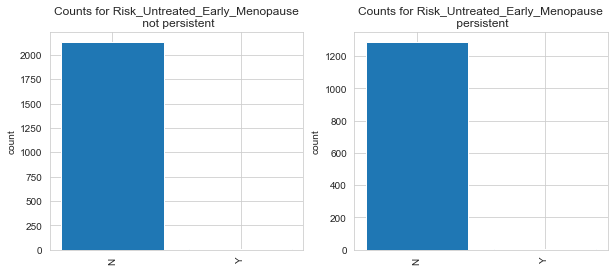

 
Risk_Patient_Parent_Fractured_Their_Hip
 


,Persistency_Flag,Risk_Patient_Parent_Fractured_Their_Hip,dummy
0,Non-Persistent,N,1979
1,Non-Persistent,Y,156
2,Persistent,N,1189
3,Persistent,Y,100


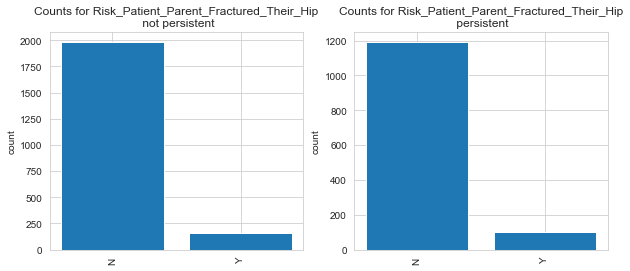

 
Risk_Smoking_Tobacco
 


,Persistency_Flag,Risk_Smoking_Tobacco,dummy
0,Non-Persistent,N,1797
1,Non-Persistent,Y,338
2,Persistent,N,983
3,Persistent,Y,306


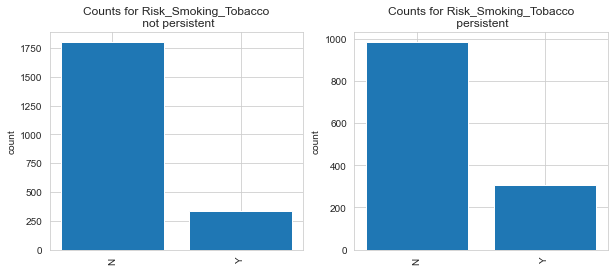

 
Risk_Chronic_Malnutrition_Or_Malabsorption
 


,Persistency_Flag,Risk_Chronic_Malnutrition_Or_Malabsorption,dummy
0,Non-Persistent,N,1870
1,Non-Persistent,Y,265
2,Persistent,N,1084
3,Persistent,Y,205


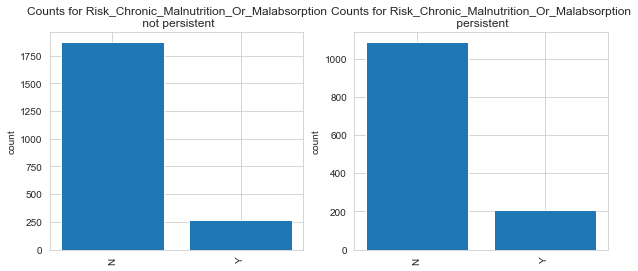

 
Risk_Chronic_Liver_Disease
 


,Persistency_Flag,Risk_Chronic_Liver_Disease,dummy
0,Non-Persistent,N,2126
1,Non-Persistent,Y,9
2,Persistent,N,1280
3,Persistent,Y,9


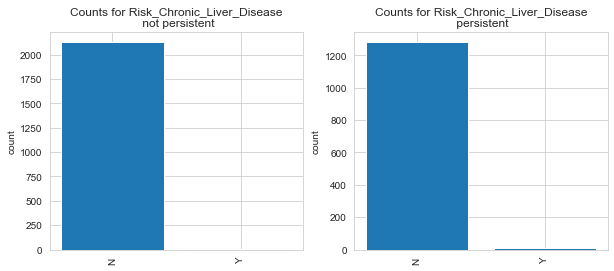

 
Risk_Family_History_Of_Osteoporosis
 


,Persistency_Flag,Risk_Family_History_Of_Osteoporosis,dummy
0,Non-Persistent,N,1910
1,Non-Persistent,Y,225
2,Persistent,N,1156
3,Persistent,Y,133


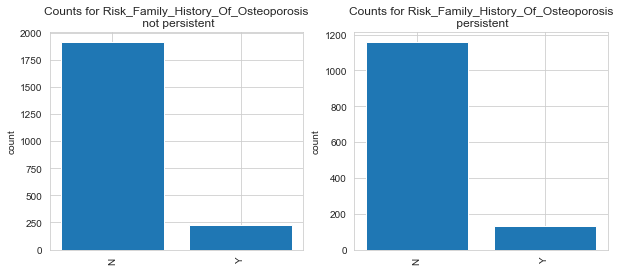

 
Risk_Low_Calcium_Intake
 


,Persistency_Flag,Risk_Low_Calcium_Intake,dummy
0,Non-Persistent,N,2107
1,Non-Persistent,Y,28
2,Persistent,N,1275
3,Persistent,Y,14


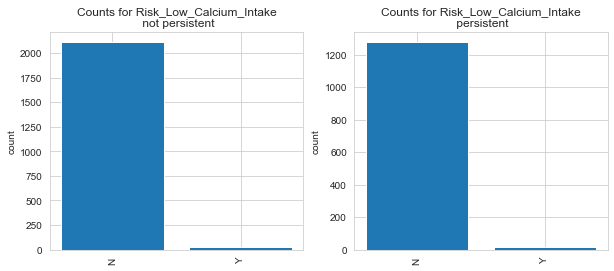

 
Risk_Vitamin_D_Insufficiency
 


,Persistency_Flag,Risk_Vitamin_D_Insufficiency,dummy
0,Non-Persistent,N,1181
1,Non-Persistent,Y,954
2,Persistent,N,607
3,Persistent,Y,682


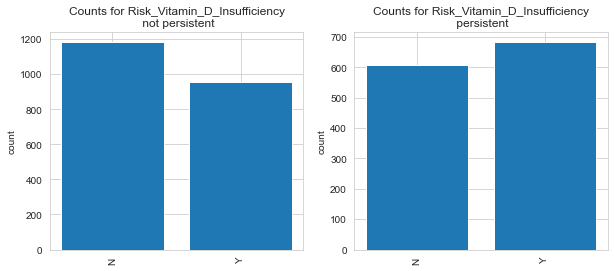

 
Risk_Poor_Health_Frailty
 


,Persistency_Flag,Risk_Poor_Health_Frailty,dummy
0,Non-Persistent,N,1998
1,Non-Persistent,Y,137
2,Persistent,N,1234
3,Persistent,Y,55


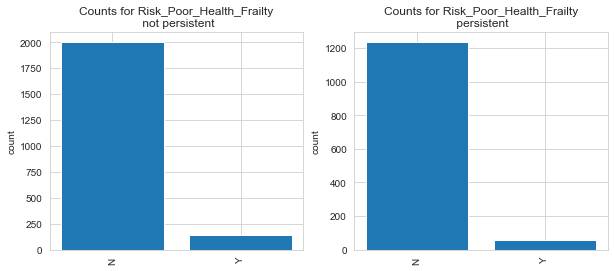

 
Risk_Excessive_Thinness
 


,Persistency_Flag,Risk_Excessive_Thinness,dummy
0,Non-Persistent,N,2084
1,Non-Persistent,Y,51
2,Persistent,N,1273
3,Persistent,Y,16


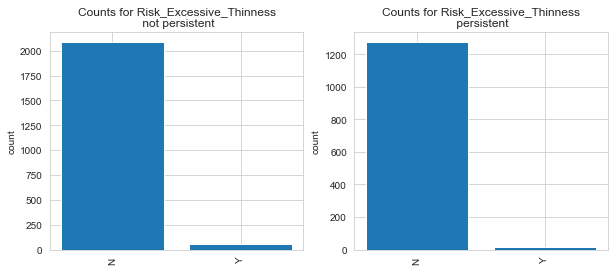

 
Risk_Hysterectomy_Oophorectomy
 


,Persistency_Flag,Risk_Hysterectomy_Oophorectomy,dummy
0,Non-Persistent,N,2098
1,Non-Persistent,Y,37
2,Persistent,N,1272
3,Persistent,Y,17


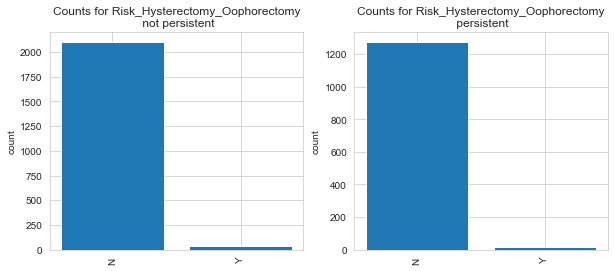

 
Risk_Estrogen_Deficiency
 


,Persistency_Flag,Risk_Estrogen_Deficiency,dummy
0,Non-Persistent,N,2127
1,Non-Persistent,Y,8
2,Persistent,N,1286
3,Persistent,Y,3


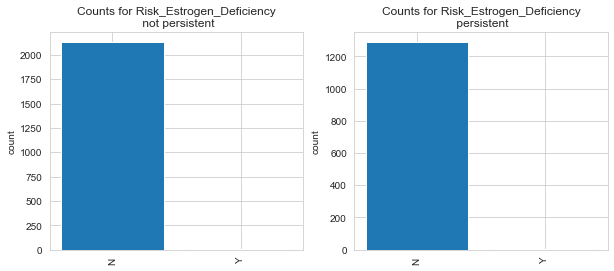

 
Risk_Immobilization
 


,Persistency_Flag,Risk_Immobilization,dummy
0,Non-Persistent,N,2121
1,Non-Persistent,Y,14
2,Persistent,N,1289


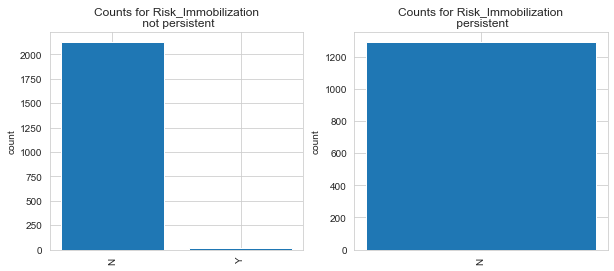

 
Risk_Recurring_Falls
 


,Persistency_Flag,Risk_Recurring_Falls,dummy
0,Non-Persistent,N,2087
1,Non-Persistent,Y,48
2,Persistent,N,1268
3,Persistent,Y,21


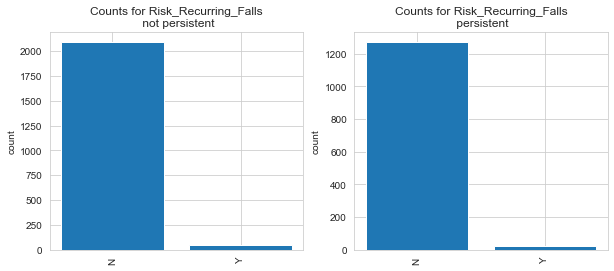

In [46]:
# visualize class separation by categorical features
for col in categorical_features:
    print(' ')
    print(col)
    print(' ')
    counts = df[['dummy', 'Persistency_Flag', col]].groupby(['Persistency_Flag', col], as_index = False).count()
    display(counts)
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp1 = counts[counts['Persistency_Flag'] == 'Non-Persistent'][[col, 'dummy']]
    plt.bar(temp1[col], temp1.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n not persistent')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp2 = counts[counts['Persistency_Flag'] == 'Persistent'][[col, 'dummy']]
    plt.bar(temp2[col], temp2.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n persistent')
    plt.ylabel('count')
    plt.show()

In [47]:
df.Persistency_Flag = (df.Persistency_Flag == 'Persistent').astype(int)

In [48]:
df.Persistency_Flag.head()

0    1
1    0
2    0
3    0
4    0
Name: Persistency_Flag, dtype: int32

In [50]:
#getting global mean for those who are persistent
global_mean = df.Persistency_Flag.mean()
round(global_mean, 3)

0.376

In [51]:
for col in categorical_features:
    df_group = df.groupby(by=col).Persistency_Flag.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
Gender,,,
Female,0.375232,-0.001228,0.996738
Male,0.396907,0.020447,1.054314


,mean,diff,risk
Race,,,
African American,0.315789,-0.060671,0.838839
Asian,0.488095,0.111635,1.296538
Caucasian,0.376429,-0.000031,0.999918
Other/Unknown,0.340206,-0.036254,0.903697


,mean,diff,risk
Ethnicity,,,
Hispanic,0.326531,-0.049930,0.867371
Not Hispanic,0.379289,0.002829,1.007514
Unknown,0.329670,-0.046790,0.875711


,mean,diff,risk
Region,,,
Midwest,0.324657,-0.051804,0.862393
Northeast,0.422414,0.045954,1.122067
Other/Unknown,0.416667,0.040206,1.106801
South,0.396151,0.019690,1.052304
West,0.444223,0.067763,1.180000


,mean,diff,risk
Age_Bucket,,,
55-65,0.356071,-0.020389,0.945839
65-75,0.398711,0.022251,1.059105
<55,0.379518,0.003058,1.008122
>75,0.369701,-0.006759,0.982046


,mean,diff,risk
Ntm_Speciality,,,
CARDIOLOGY,0.000000,-0.376460,0.000000
CLINICAL NURSE SPECIALIST,0.000000,-0.376460,0.000000
EMERGENCY MEDICINE,0.000000,-0.376460,0.000000
ENDOCRINOLOGY,0.495633,0.119173,1.316562
GASTROENTEROLOGY,0.000000,-0.376460,0.000000
GENERAL PRACTITIONER,0.321824,-0.054636,0.854869
GERIATRIC MEDICINE,0.000000,-0.376460,0.000000
HEMATOLOGY & ONCOLOGY,0.428571,0.052111,1.138424
HOSPICE AND PALLIATIVE MEDICINE,0.500000,0.123540,1.328161


,mean,diff,risk
Ntm_Specialist_Flag,,,
Others,0.319921,-0.056540,0.849812
Specialist,0.457123,0.080662,1.214265


,mean,diff,risk
Ntm_Speciality_Bucket,,,
Endo/Onc/Uro,0.539106,0.162646,1.432040
OB/GYN/Others/PCP/Unknown,0.320817,-0.055643,0.852195
Rheum,0.377483,0.001023,1.002718


,mean,diff,risk
Gluco_Record_Prior_Ntm,,,
N,0.378007,0.001547,1.004108
Y,0.371429,-0.005032,0.986634


,mean,diff,risk
Gluco_Record_During_Rx,,,
N,0.31483,-0.061631,0.836289
Y,0.54878,0.172320,1.457738


,mean,diff,risk
Dexa_During_Rx,,,
N,0.230305,-0.146155,0.611766
Y,0.764957,0.388497,2.031973


,mean,diff,risk
Frag_Frac_Prior_Ntm,,,
N,0.376393,-0.000068,0.999821
Y,0.376812,0.000351,1.000933


,mean,diff,risk
Frag_Frac_During_Rx,,,
N,0.357167,-0.019294,0.948750
Y,0.515588,0.139127,1.369567


,mean,diff,risk
Risk_Segment_Prior_Ntm,,,
HR_VHR,0.369725,-0.006735,0.982110
VLR_LR,0.381668,0.005207,1.013832


,mean,diff,risk
Tscore_Bucket_Prior_Ntm,,,
<=-2.5,0.365920,-0.010540,0.972001
>-2.5,0.384418,0.007958,1.021139


,mean,diff,risk
Risk_Segment_During_Rx,,,
HR_VHR,0.453886,0.077426,1.205668
Unknown,0.277221,-0.099239,0.736389
VLR_LR,0.453222,0.076762,1.203905


,mean,diff,risk
Tscore_Bucket_During_Rx,,,
<=-2.5,0.439528,0.063068,1.167528
>-2.5,0.469231,0.092770,1.246428
Unknown,0.277221,-0.099239,0.736389


,mean,diff,risk
Change_T_Score,,,
Improved,0.702128,0.325667,1.865078
No change,0.422289,0.045829,1.121736
Unknown,0.277221,-0.099239,0.736389
Worsened,0.618497,0.242037,1.642928


,mean,diff,risk
Change_Risk_Segment,,,
Improved,0.590909,0.214449,1.569645
No change,0.409696,0.033236,1.088284
Unknown,0.346344,-0.030117,0.920001
Worsened,0.603306,0.226846,1.602575


,mean,diff,risk
Adherent_Flag,,,
Adherent,0.363888,-0.012572,0.966604
Non-Adherent,0.612717,0.236256,1.627573


,mean,diff,risk
Idn_Indicator,,,
N,0.283737,-0.092723,0.753697
Y,0.407900,0.031440,1.083514


,mean,diff,risk
Injectable_Experience_During_Rx,,,
N,0.239130,-0.137330,0.635208
Y,0.392997,0.016537,1.043928


,mean,diff,risk
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,,,
N,0.235854,-0.140606,0.626504
Y,0.549902,0.173442,1.460718


,mean,diff,risk
Comorb_Encounter_For_Immunization,,,
N,0.240712,-0.135749,0.639408
Y,0.547918,0.171458,1.455447


,mean,diff,risk
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",,,
N,0.263031,-0.113429,0.698695
Y,0.550296,0.173836,1.461763


,mean,diff,risk
Comorb_Vitamin_D_Deficiency,,,
N,0.319176,-0.057284,0.847835
Y,0.498628,0.122167,1.324516


,mean,diff,risk
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,,,
N,0.303918,-0.072543,0.807303
Y,0.552553,0.176092,1.467758


,mean,diff,risk
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,,,
N,0.319787,-0.056673,0.849458
Y,0.565107,0.188647,1.501108


,mean,diff,risk
Comorb_Long_Term_Current_Drug_Therapy,,,
N,0.280783,-0.095678,0.745849
Y,0.681763,0.305302,1.810981


,mean,diff,risk
Comorb_Dorsalgia,,,
N,0.319849,-0.056612,0.849622
Y,0.568678,0.192218,1.510592


,mean,diff,risk
Comorb_Personal_History_Of_Other_Diseases_And_Conditions,,,
N,0.323626,-0.052835,0.859654
Y,0.590842,0.214382,1.569467


,mean,diff,risk
Comorb_Other_Disorders_Of_Bone_Density_And_Structure,,,
N,0.325877,-0.050583,0.865636
Y,0.660232,0.283771,1.753788


,mean,diff,risk
Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,,,
N,0.294756,-0.081704,0.782967
Y,0.453258,0.076798,1.203999


,mean,diff,risk
Comorb_Osteoporosis_without_current_pathological_fracture,,,
N,0.335461,-0.041000,0.891092
Y,0.488550,0.112089,1.297745


,mean,diff,risk
Comorb_Personal_history_of_malignant_neoplasm,,,
N,0.335495,-0.040965,0.891184
Y,0.551618,0.175158,1.465275


,mean,diff,risk
Comorb_Gastro_esophageal_reflux_disease,,,
N,0.325698,-0.050762,0.865159
Y,0.601587,0.225127,1.598010


,mean,diff,risk
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,,,
N,0.332293,-0.044168,0.882676
Y,0.460237,0.083777,1.222538


,mean,diff,risk
Concom_Narcotics,,,
N,0.306709,-0.069751,0.814719
Y,0.500406,0.123945,1.329239


,mean,diff,risk
Concom_Systemic_Corticosteroids_Plain,,,
N,0.302326,-0.074135,0.803074
Y,0.563207,0.186746,1.496058


,mean,diff,risk
Concom_Anti_Depressants_And_Mood_Stabilisers,,,
N,0.343205,-0.033255,0.911663
Y,0.461940,0.085479,1.227060


,mean,diff,risk
Concom_Fluoroquinolones,,,
N,0.333333,-0.043127,0.885441
Y,0.565149,0.188689,1.501218


,mean,diff,risk
Concom_Cephalosporins,,,
N,0.326834,-0.049626,0.868178
Y,0.608624,0.232163,1.616701


,mean,diff,risk
Concom_Macrolides_And_Similar_Types,,,
N,0.328426,-0.048034,0.872406
Y,0.616462,0.240002,1.637523


,mean,diff,risk
Concom_Broad_Spectrum_Penicillins,,,
N,0.339698,-0.036762,0.902349
Y,0.626424,0.249963,1.663983


,mean,diff,risk
Concom_Anaesthetics_General,,,
N,0.332081,-0.044380,0.882113
Y,0.637827,0.261367,1.694274


,mean,diff,risk
Concom_Viral_Vaccines,,,
N,0.339954,-0.036506,0.903029
Y,0.694051,0.317591,1.843623


,mean,diff,risk
Risk_Type_1_Insulin_Dependent_Diabetes,,,
N,0.378387,0.001926,1.005117
Y,0.330935,-0.045525,0.879071


,mean,diff,risk
Risk_Osteogenesis_Imperfecta,,,
N,0.376498,0.000038,1.000100
Y,0.333333,-0.043127,0.885441


,mean,diff,risk
Risk_Rheumatoid_Arthritis,,,
N,0.371281,-0.005179,0.986242
Y,0.507692,0.131232,1.348595


,mean,diff,risk
Risk_Untreated_Chronic_Hyperthyroidism,,,
N,0.37668,0.00022,1.000584
Y,0.00000,-0.37646,0.000000


,mean,diff,risk
Risk_Untreated_Chronic_Hypogonadism,,,
N,0.370033,-0.006427,0.982928
Y,0.543307,0.166847,1.443199


,mean,diff,risk
Risk_Untreated_Early_Menopause,,,
N,0.376612,0.000152,1.000403
Y,0.333333,-0.043127,0.885441


,mean,diff,risk
Risk_Patient_Parent_Fractured_Their_Hip,,,
N,0.375316,-0.001145,0.996960
Y,0.390625,0.014165,1.037626


,mean,diff,risk
Risk_Smoking_Tobacco,,,
N,0.353597,-0.022863,0.939268
Y,0.475155,0.098695,1.262166


,mean,diff,risk
Risk_Chronic_Malnutrition_Or_Malabsorption,,,
N,0.36696,-0.00950,0.974764
Y,0.43617,0.05971,1.158609


,mean,diff,risk
Risk_Chronic_Liver_Disease,,,
N,0.375807,-0.000653,0.998266
Y,0.500000,0.123540,1.328161


,mean,diff,risk
Risk_Family_History_Of_Osteoporosis,,,
N,0.377038,0.000578,1.001536
Y,0.371508,-0.004952,0.986846


,mean,diff,risk
Risk_Low_Calcium_Intake,,,
N,0.376996,0.000536,1.001423
Y,0.333333,-0.043127,0.885441


,mean,diff,risk
Risk_Vitamin_D_Insufficiency,,,
N,0.339485,-0.036975,0.901783
Y,0.416870,0.040410,1.107342


,mean,diff,risk
Risk_Poor_Health_Frailty,,,
N,0.381807,0.005347,1.014202
Y,0.286458,-0.090002,0.760926


,mean,diff,risk
Risk_Excessive_Thinness,,,
N,0.379208,0.002747,1.007298
Y,0.238806,-0.137654,0.634346


,mean,diff,risk
Risk_Hysterectomy_Oophorectomy,,,
N,0.377448,0.000988,1.002624
Y,0.314815,-0.061645,0.836250


,mean,diff,risk
Risk_Estrogen_Deficiency,,,
N,0.376795,0.000334,1.000888
Y,0.272727,-0.103733,0.724452


,mean,diff,risk
Risk_Immobilization,,,
N,0.378006,0.001546,1.004106
Y,0.000000,-0.376460,0.000000


,mean,diff,risk
Risk_Recurring_Falls,,,
N,0.377943,0.001483,1.003940
Y,0.304348,-0.072112,0.808446


In [52]:
from sklearn.metrics import mutual_info_score

In [56]:
#mutual information scores for the categorical variables
def calculate_mi(series):
    return mutual_info_score(series, df.Persistency_Flag)

df_mi = df[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
print(df_mi)

                                                              MI
Dexa_During_Rx                                      1.211142e-01
Comorb_Long_Term_Current_Drug_Therapy               6.101576e-02
Comorb_Encounter_For_Screening_For_Malignant_Ne...  5.251710e-02
Comorb_Encounter_For_Immunization                   5.002321e-02
Comorb_Encntr_For_General_Exam_W_O_Complaint,_S...  4.192601e-02
...                                                          ...
Gluco_Record_Prior_Ntm                              1.659650e-05
Risk_Untreated_Early_Menopause                      1.416782e-05
Risk_Family_History_Of_Osteoporosis                 6.108238e-06
Risk_Osteogenesis_Imperfecta                        3.532791e-06
Frag_Frac_Prior_Ntm                                 5.052294e-08

[65 rows x 1 columns]


In [57]:
#quantitative analysis
#chi square test (test of independence)
#creating a function for chi square test
def chi_square_test(col):
    print('Ho:Persistency is not dependent on '+col)
    print('H1:Persistency is dependent on '+col)
    import scipy.stats as stats #importing stats
    #creating a contigency table
    value_list = df[col].unique().tolist()#creating list of column values
    for value in value_list:
        data_crosstab = pd.crosstab(df['Persistency_Flag']==1,df[col]==value,
                                margins=True, margins_name="Total")
    # significance level
    alpha = 0.05
    # Calcualtion of Chisquare test statistics
    chi_square = 0
    rows = (df['Persistency_Flag']==1).unique()
    columns = (df[col]==value).unique()
    for i in columns:
        for j in rows:
            O = data_crosstab[i][j]
            E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
            chi_square += (O-E)**2/E
    # The p-value approach
    p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
    conclusion = "Failed to reject the null hypothesis."
    if p_value <= alpha:
        conclusion = "Null Hypothesis is rejected."

    print("chisquare-score is:", chi_square, " and p value is:", p_value)
    print(conclusion)

In [58]:
#getting chi square test for the categorical columns
for col in categorical_features:
    print(col)
    chi_square_test(col)
    print(' ')

Gender
Ho:Persistency is not dependent on Gender
H1:Persistency is dependent on Gender
chisquare-score is: 0.36627405732727586  and p value is: 0.7368701543427314
Failed to reject the null hypothesis.
 
Race
Ho:Persistency is not dependent on Race
H1:Persistency is dependent on Race
chisquare-score is: 1.5322153903788895  and p value is: 0.2972884123904047
Failed to reject the null hypothesis.
 
Ethnicity
Ho:Persistency is not dependent on Ethnicity
H1:Persistency is dependent on Ethnicity
chisquare-score is: 0.8718900574262487  and p value is: 0.5509690160747311
Failed to reject the null hypothesis.
 
Region
Ho:Persistency is not dependent on Region
H1:Persistency is dependent on Region
chisquare-score is: 2.238788169323524  and p value is: 0.10771197815803846
Failed to reject the null hypothesis.
 
Age_Bucket
Ho:Persistency is not dependent on Age_Bucket
H1:Persistency is dependent on Age_Bucket
chisquare-score is: 0.006949016381882313  and p value is: 0.8396574453455774
Failed to re

chisquare-score is: 104.66226258586042  and p value is: 0.0
Null Hypothesis is rejected.
 
Comorb_Gastro_esophageal_reflux_disease
Ho:Persistency is not dependent on Comorb_Gastro_esophageal_reflux_disease
H1:Persistency is dependent on Comorb_Gastro_esophageal_reflux_disease
chisquare-score is: 166.69396195337544  and p value is: 0.0
Null Hypothesis is rejected.
 
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
Ho:Persistency is not dependent on Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
H1:Persistency is dependent on Concom_Cholesterol_And_Triglyceride_Regulating_Preparations
chisquare-score is: 53.9731625607714  and p value is: 0.0
Null Hypothesis is rejected.
 
Concom_Narcotics
Ho:Persistency is not dependent on Concom_Narcotics
H1:Persistency is dependent on Concom_Narcotics
chisquare-score is: 126.10457366605691  and p value is: 0.0
Null Hypothesis is rejected.
 
Concom_Systemic_Corticosteroids_Plain
Ho:Persistency is not dependent on Concom_Systemic_

In [59]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  6


,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,sqrt_Dexa_Freq_During_Rx,sqrt_Count_Of_Risks,dummy
0,1,0.0,0,0.0,0.000000,1.0
1,0,0.0,0,0.0,0.000000,1.0
2,0,0.0,2,0.0,1.414214,1.0
3,0,0.0,1,0.0,1.000000,1.0
4,0,0.0,1,0.0,1.000000,1.0


In [60]:
#Correlation Matrix
corr_Matrix=df.corr()
corr_Matrix

,Persistency_Flag,Dexa_Freq_During_Rx,Count_Of_Risks,sqrt_Dexa_Freq_During_Rx,sqrt_Count_Of_Risks,dummy
Persistency_Flag,1.000000,0.517337,0.082431,0.516127,0.082974,NaN
Dexa_Freq_During_Rx,0.517337,1.000000,0.063414,0.991697,0.064136,NaN
Count_Of_Risks,0.082431,0.063414,1.000000,0.067144,0.942551,NaN
sqrt_Dexa_Freq_During_Rx,0.516127,0.991697,0.067144,1.000000,0.066832,NaN
sqrt_Count_Of_Risks,0.082974,0.064136,0.942551,0.066832,1.000000,NaN
dummy,NaN,NaN,NaN,NaN,NaN,NaN


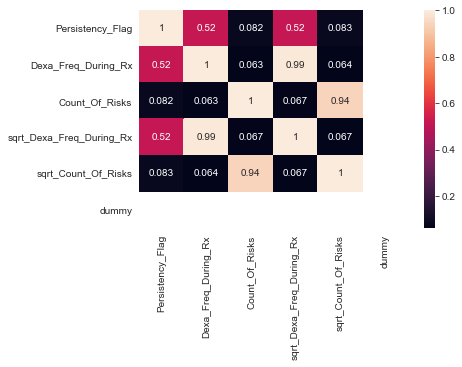

In [61]:
#Heatmap to check for correlation
sns.heatmap(corr_Matrix,annot=True)
plt.show()

In [68]:
#ANOVA test
#creating a function for the ANOVA test
def ANOVA(df, col='Dexa_Freq_During_Rx'):
    #creating the hypothesis
    print('Ho:Persistency is not positively correlated with ' + col)
    print('H1:Persistency is positively correlated with ' + col)
    df = df[[col, 'Persistency_Flag']]
    persistent = df[col][df['Persistency_Flag']==1]
    persistent = persistent.to_numpy()
    not_persistent = df[col][df['Persistency_Flag']==0]
    not_persistent = not_persistent.to_numpy()
    #one-way ANOVA
    import scipy.stats as stats
    fvalue, pvalue = stats.f_oneway(persistent, not_persistent)
    print('fvalue='+str(fvalue))
    print('pvalue='+str(pvalue))
    if pvalue.all() <= 0.05:
        print('Null hypothesis is rejected')
    else:
        print('Failed to reject the Null hypothesis')
#getting anova test for the numerical columns
for col in numerical_features:
    print(col)
    ANOVA(df, col)
    print(' ')

Persistency_Flag
Ho:Persistency is not positively correlated with Persistency_Flag
H1:Persistency is positively correlated with Persistency_Flag
fvalue=[nan nan]
pvalue=[nan nan]
Failed to reject the Null hypothesis
 
Dexa_Freq_During_Rx
Ho:Persistency is not positively correlated with Dexa_Freq_During_Rx
H1:Persistency is positively correlated with Dexa_Freq_During_Rx
fvalue=1250.5482748531676
pvalue=9.272371038407641e-234
Failed to reject the Null hypothesis
 
Count_Of_Risks
Ho:Persistency is not positively correlated with Count_Of_Risks
H1:Persistency is positively correlated with Count_Of_Risks
fvalue=23.41115746355809
pvalue=1.3659468945090359e-06
Failed to reject the Null hypothesis
 
sqrt_Dexa_Freq_During_Rx
Ho:Persistency is not positively correlated with sqrt_Dexa_Freq_During_Rx
H1:Persistency is positively correlated with sqrt_Dexa_Freq_During_Rx
fvalue=1242.5850029786693
pvalue=1.7206365380521335e-232
Failed to reject the Null hypothesis
 
sqrt_Count_Of_Risks
Ho:Persistency 

C:\Users\reshm\anaconda3\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


AttributeError: 'float' object has no attribute 'all'

0    2135
1    2135
Name: Persistency_Flag, dtype: int64
Persistency_Flag


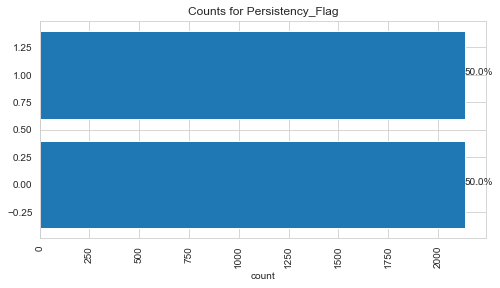

In [69]:
# dealing with class imbalance in the target variable
# oversampling the minority class i.e 'Persistent'

from sklearn.utils import resample

# separating minority and majority classes
non_persistent = df[df['Persistency_Flag']==0]
persistent = df[df['Persistency_Flag']==1]

# oversampling minority
persistent_upsampled = resample(persistent,
                           replace=True, # sample with replacement
                           n_samples=len(non_persistent), # match number in majority class
                           random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_df = pd.concat([non_persistent, persistent_upsampled])

# check new class counts
print(upsampled_df['Persistency_Flag'].value_counts())
# plotting graph of upsampled dataset
plot_catcols(['Persistency_Flag'], upsampled_df)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
#splitting data into train, validation and test dataframes
df_full_train, df_test = train_test_split(upsampled_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [72]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [73]:
y_train = df_train.Persistency_Flag.values
y_val = df_val.Persistency_Flag.values
y_test = df_test.Persistency_Flag.values

del df_train['Persistency_Flag']
del df_val['Persistency_Flag']
del df_test['Persistency_Flag']

In [74]:
# encoding categorical variables as binary dummy variables
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown = 'ignore')
X_train=ohe.fit_transform(df_train)
#X_train
X_val=ohe.transform(df_val)

Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression(solver='liblinear',random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [77]:
model.intercept_[0]

0.00454836917702823

In [78]:
model.coef_[0].round(3)

array([-0.13 ,  0.135, -0.459,  0.467,  0.107, -0.111,  0.111, -0.052,
       -0.054, -0.291,  0.535, -0.21 ,  0.247, -0.275, -0.118, -0.259,
        0.191,  0.191, -1.564, -0.055, -0.415, -0.293,  0.192, -0.106,
       -0.302, -0.171,  0.182,  0.199, -0.032,  0.062,  0.522,  0.814,
       -0.063, -0.298, -0.021, -0.398, -0.015,  0.861,  1.05 , -0.299,
       -0.133,  0.328, -0.51 , -0.   ,  0.283, -0.13 , -0.241,  0.56 ,
       -0.184,  0.188,  0.158, -0.153, -0.   ,  0.269, -0.264,  0.061,
       -0.056, -0.312, -1.234, -1.464, -0.274,  0.445,  0.936,  0.502,
        0.954,  0.453, -0.312,  0.317,  0.201, -0.196, -0.149,  0.153,
        0.122, -0.117, -0.067,  0.071,  0.106, -0.152,  0.051,  0.206,
       -0.049, -0.152,  0.637, -0.165, -0.152, -0.316,  0.329, -0.683,
       -0.208,  0.566, -0.219,  0.224, -0.258,  0.263, -0.063,  0.068,
       -0.387,  0.392, -0.159,  0.163, -0.374,  0.379, -0.413,  0.418,
       -0.07 ,  0.074, -0.037,  0.042, -0.528,  0.533, -0.262,  0.266,
      

In [79]:
y_pred = model.predict_proba(X_val)[:,1]

In [80]:
persistency = y_pred > 0.5

In [81]:
#Accuracy
(y_val == persistency).mean()

0.8161592505854801

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
#Rechecking the best threshold
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.527
0.05 0.609
0.10 0.692
0.15 0.737
0.20 0.769
0.25 0.789
0.30 0.802
0.35 0.806
0.40 0.810
0.45 0.810
0.50 0.816
0.55 0.814
0.60 0.797
0.65 0.795
0.70 0.779
0.75 0.765
0.80 0.732
0.85 0.701
0.90 0.674
0.95 0.638
1.00 0.473


In [86]:
#evaluating the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
# getting AUC of the model
print(f'AUC is {roc_auc_score(y_val,y_pred)}')
print(f'F1 score is {f1_score(y_val,y_pred>0.5)}')

AUC is 0.8860176017601761
F1 score is 0.8209806157354619


LGBM Classifier

In [87]:
from lightgbm import LGBMClassifier

In [88]:
model = LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [89]:
y_pred = model.predict_proba(X_val)[:,1]

In [90]:
persistency = y_pred > 0.5

In [91]:
#Accuracy
(y_val == persistency).mean()

0.8548009367681498

In [92]:
#evaluating the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
# getting AUC of the model
print(f'AUC is {roc_auc_score(y_val,y_pred)}')
print(f'F1 score is {f1_score(y_val,y_pred>0.5)}')

AUC is 0.9238833883388339
F1 score is 0.8640350877192982


Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

In [95]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [96]:
y_pred = clf_gini.predict_proba(X_val)[:,1]

In [97]:
persistency = y_pred > 0.5

In [98]:
#Accuracy
(y_val == persistency).mean()

0.7564402810304449

In [99]:
#evaluating the model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
# getting AUC of the model
print(f'AUC is {roc_auc_score(y_val,y_pred)}')
print(f'F1 score is {f1_score(y_val,y_pred>0.5)}')

AUC is 0.8202805280528053
F1 score is 0.7541371158392436
